----

#TPN°1: Análisis y Visualización de Datos

##Mentoría 10: ¿Cómo vivimos las y los argentinos? Relación entre hábitos de vida, alimentación y prevalencia de las principales enfermedades no transmisibles.

###Integrantes:
* Antonel, Maximiliano
* Caullo, María Laura
* Juárez, Victor Manuel
* Gomez, Camila

---



In [ ]:
! git clone https://github.com/MarianaPereyra45/EPH.git

Cloning into 'EPH'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 18 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), 28.42 MiB | 14.58 MiB/s, done.


In [ ]:
pip install wordcloud matplotlib

In [ ]:
from os import path
import pandas as pd
import locale
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
df = pd.read_excel('/content/EPH/ENFR2018.xlsx')

##Exploración

In [ ]:
df.head()

,id,cod_provincia,region,tamanio_aglomerado,aglomerado,localidades_150,submuestra,bhcv01,bhcv02,bhcv03,...,glucemia_elevada,prevalencia_glucemia_elevada_combinada,findrisc,bimq06,bimq06_01,colesterol_elevado,prevalencia_colesterol_combinada,wf1p,wf2p,wf3p
0,1128639,2,1,1,1,1,1,3,2,1,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2378,4464,0
1,1709939,2,1,1,1,1,0,1,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3588,0,0
2,6874130,2,1,1,1,1,0,3,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2740,0,0
3,10319375,2,1,1,1,1,1,3,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,493,0,0
4,11140857,2,1,1,1,1,0,3,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29224 entries, 0 to 29223
Columns: 287 entries, id to wf3p
dtypes: float64(186), int64(101)
memory usage: 64.0 MB


In [ ]:
df.describe(include='all')

,id,cod_provincia,region,tamanio_aglomerado,aglomerado,localidades_150,submuestra,bhcv01,bhcv02,bhcv03,...,glucemia_elevada,prevalencia_glucemia_elevada_combinada,findrisc,bimq06,bimq06_01,colesterol_elevado,prevalencia_colesterol_combinada,wf1p,wf2p,wf3p
count,2.922400e+04,29224.000000,29224.000000,29224.000000,29224.000000,29224.000000,29224.000000,29224.000000,29224.000000,29224.000000,...,5188.000000,5164.00000,13096.000000,4911.000000,420.0,4911.000000,3403.000000,29224.000000,29224.000000,29224.000000
mean,1.075470e+09,38.383931,3.169176,3.235389,7.596496,0.432761,0.743191,1.307692,3.136395,1.153299,...,1.908250,1.87471,2.384316,187.801059,98.0,1.704948,1.604173,954.594717,954.589858,673.476047
std,6.223720e+08,28.722040,1.585765,1.056942,2.842691,0.495467,0.436881,0.751898,1.251223,0.397492,...,0.288701,0.33108,1.138206,30.787540,0.0,0.456113,0.489100,1404.281828,2142.708718,2494.059408
min,1.171400e+04,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,150.000000,98.0,1.000000,1.000000,24.000000,0.000000,0.000000
25%,5.358276e+08,10.000000,2.000000,3.000000,9.000000,0.000000,0.000000,1.000000,2.000000,1.000000,...,2.000000,2.00000,1.000000,163.000000,98.0,1.000000,1.000000,236.000000,0.000000,0.000000
50%,1.079500e+09,34.000000,3.000000,4.000000,9.000000,0.000000,1.000000,1.000000,3.000000,1.000000,...,2.000000,2.00000,2.000000,180.000000,98.0,2.000000,2.000000,468.000000,226.000000,0.000000
75%,1.622154e+09,62.000000,4.000000,4.000000,9.000000,1.000000,1.000000,1.000000,4.000000,1.000000,...,2.000000,2.00000,3.000000,205.000000,98.0,2.000000,2.000000,1037.000000,895.000000,0.000000
max,2.147433e+09,94.000000,6.000000,4.000000,9.000000,1.000000,1.000000,7.000000,16.000000,4.000000,...,2.000000,2.00000,5.000000,300.000000,98.0,2.000000,2.000000,23922.000000,41470.000000,54990.000000


##CONSIGNAS

##Pregunta 1

---

1. ¿Las prácticas preventivas que las personas realizan están relacionadas con los ingresos que las personas poseen o al hecho de que las personas posean obra social o algún tipo de cobertura de medicina prepaga?

---

Se eligieron todas las variables relacionadas a esta pregunta. Sin embardo para responder seleccionamos las mas generales que nos permitian encontrar las asociaciones necesarias.

In [ ]:
df_pregunta_1 = df.loc[:,['cod_provincia', 'region', 'cant_componentes', 'bhih01', 'quintil_uc', 'bhch03_j', 'nivel_instruccion_j', 'bhch10_01_j', 'bhch10_02_j',
                          'bhch10_03_j', 'bhch10_04_j', 'bhch10_05_j', 'bhch10_06_j', 'cobertura_salud_j', 'condicion_actividad_j', 'bhch03', 'cobertura_salud','condicion_actividad',
                          'biaf01' ,'biaf03' ,'biaf05' ,'biaf08' ,'nivel_actividad_fisica' ,'bita01' ,'bita04' ,'bita08' , 'consumo_tabaco_100','biha01' ,'biha04' ,'biha12' ,'biha13' ,
                          'bipc01' ,'bipc02', 'bipc03', 'bial01', 'bial03', 'bial05', 'bial07', 'bico01', 'bica01', 'bica02', 'bica03_01', 'bipp01', 'bipp03', 'bicc01_01',
                          'bicc01_02', 'bicc01_03', 'bicc02']]
df_pregunta_1[:3]

,cod_provincia,region,cant_componentes,bhih01,quintil_uc,bhch03_j,nivel_instruccion_j,bhch10_01_j,bhch10_02_j,bhch10_03_j,...,bico01,bica01,bica02,bica03_01,bipp01,bipp03,bicc01_01,bicc01_02,bicc01_03,bicc02
0,2,1,2,50000,5,2,7,NaN,NaN,1.0,...,1,1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,3,40000,5,1,7,NaN,1.0,NaN,...,1,1,1.0,NaN,1.0,1.0,2.0,1.0,2.0,2.0
2,2,1,2,40000,5,1,7,NaN,NaN,1.0,...,1,1,2.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN


Las variables seleccionadas para analizar son:


* `bhih01`: Monto de ingreso total mensual del hogar en pesos
* `cobertura_salud`: Cobertura de salud del jefe/a de hogar? 1 con OS o prepaga, 2 Solo cobertura Publica
* `bicc01_01`: ¿Alguna vez te ha hecho algún estudio para detectar pólipos o cáncer de colon, tal como prueba de sangre oculta en materia fecal? 1   Sí 2   No 99  Ns/Nc
* `bicc01_02`: ¿Alguna vez se ha hecho algún estudio para detectar pólipos o cáncer de colon, tal como colonoscopía? 1   Sí 2   No 99  Ns/Nc
* `bicc01_03`: ¿Alguna vez e ha hecho algún estudio para detectar pólipos o cáncer de colon, tal como radiografía de colon por enema? 1. Sí 2. No 99. Ns/Nc
* `bipp01`: ¿Alguna vez se hizo una mamografía? (Una mamografía es una radiografía de cada mama) 1. Sí 2. No 99. Ns/Nc
* `bipp03`: ¿Alguna vez se hizo un Papanicolaou? (Un Papanicolaou es un examen para detectar problemas en el cuello del útero) 1. Sí 2. No 99. Ns/Nc
* `bial01`: Agregas sal a las comidas?
* `bial03`: Cuantos dias a la semana consume fruta?
* `bial05`: Cuantos dias a la semana comes verduras?
* `biaf03`: Las actividades físicas moderadas son aquellas que le implican una ligera aceleración del ritmo cardiaco y la respiración. En la última semana,cuántos días realizó actividades físicas moderadas, durante al menos 10 minutos? (puede incluir caminata rapida) [Días por semana]. VALORES DE 0 A 7.
* `bipc03`: ¿En estos momentos está haciendo algo para mantener controlado su peso? 1 Sí 2 No
* consumo_tabaco_100: Condicion del fumador elegido aletoriamente del bloque familiar. 1. Fumador actual 2. Ex fumador 3. No fumador
* `bica02`	¿Cuándo fue la última vez que tomó alguna de estas bebidas alcohólicas? 1. Durante los últimos 30 días	2. Hace más de un mes, hasta un año	3. Hace más de un año	99. Ns/Nc
* `biha01`: ¿Alguna vez le han tomado la presión arterial? 1. Sí 2. No 99. Ns/Nc
* `bico01`: ¿Alguna vez le han medido el colesterol? 1. Sí 2. No 99. Ns/Nc


Primero decidimos explorar la distribucion de datos de la variables de ingreso total mensual del hogar

### Exploracion: Relacion Ingresos Mensuales Hogar - Cobertura OS

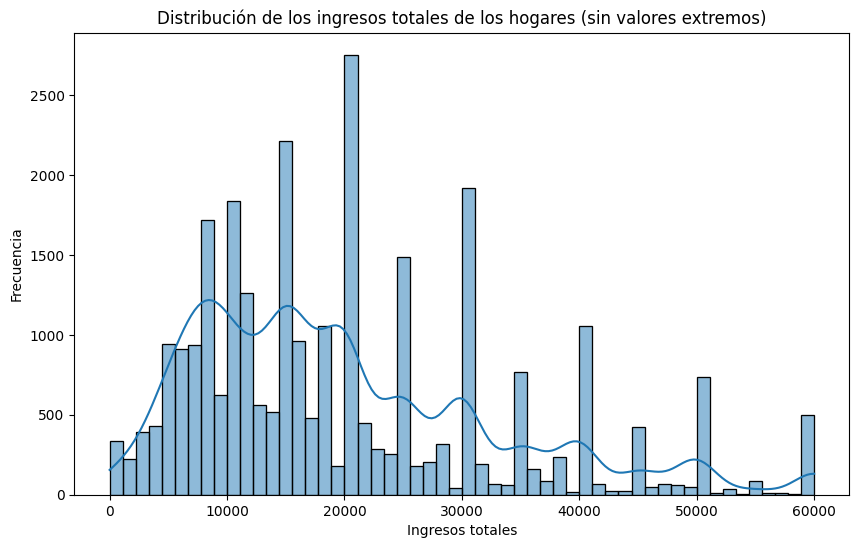

In [ ]:
# Variable analizada: Monto del ingreso total mensual del hogar en pesos
Ingreso_mensual_familiar = 'bhih01'

# Ordenar los valores de la columna
df_sorted = df.sort_values(Ingreso_mensual_familiar)

# Calcular los cuartiles Q1 y Q3 en los valores ordenados
Q1 = df_sorted[Ingreso_mensual_familiar].quantile(0.25)
Q3 = df_sorted[Ingreso_mensual_familiar].quantile(0.75)

# Calcular el IQR
IQR = Q3 - Q1

# Definir los límites inferior y superior
limite_inferior = Q1 - (1.5 * IQR)
limite_superior = Q3 + (1.5 * IQR)

# Filtrar los valores extremos
ingresos_sin_extremos = df[(df[Ingreso_mensual_familiar] >= limite_inferior) & (df[Ingreso_mensual_familiar] <= limite_superior)]

# Crear el histograma de los ingresos sin valores extremos
plt.figure(figsize=(10, 6))
sns.histplot(ingresos_sin_extremos[Ingreso_mensual_familiar], kde=True)

# Agregar título y etiquetas de los ejes
plt.title("Distribución de los ingresos totales de los hogares (sin valores extremos)")
plt.xlabel("Ingresos totales")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()

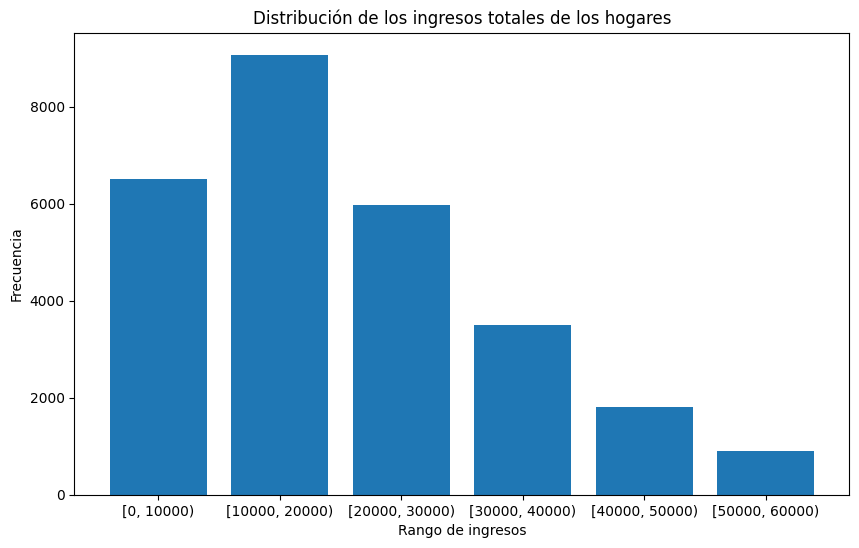

In [ ]:
# Definir los límites de los rangos de ingresos
rangos = [0, 10000, 20000, 30000, 40000, 50000, 60000]

# Crear una nueva columna con los rangos de ingresos
df['Rango de ingresos'] = pd.cut(df[Ingreso_mensual_familiar], bins=rangos, right=False)

# Contar la frecuencia de cada rango de ingresos
frecuencia = df['Rango de ingresos'].value_counts().sort_index()

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.bar(frecuencia.index.astype(str), frecuencia.values)

# Agregar título y etiquetas de los ejes
plt.title("Distribución de los ingresos totales de los hogares")
plt.xlabel("Rango de ingresos")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()

Luego, decidimos ver explorar si los ingresos del hogar se encuentran relacionados de alguna forma con la cobertura de salud de las personas encuestadas del bloque individual

<Figure size 1000x600 with 0 Axes>

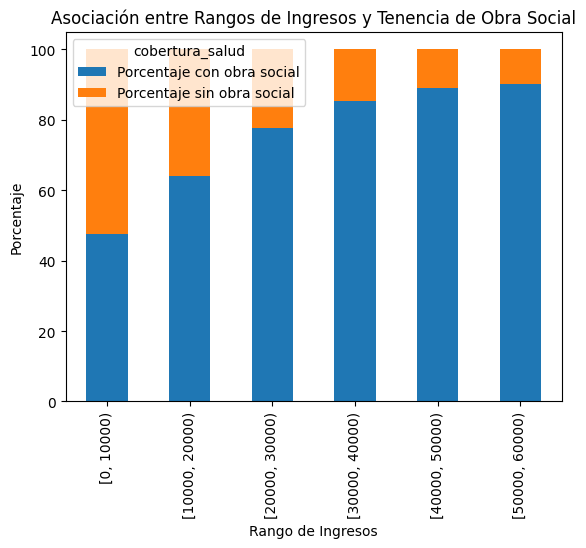

In [ ]:
# Variables analizadas
Ingreso_mensual_familiar = 'bhih01'
Cobertura_privada = 'cobertura_salud'

# Definir los límites de los rangos de ingresos
rangos = [0, 10000, 20000, 30000, 40000, 50000, 60000]

# Crear una nueva columna con los rangos de ingresos
df['Rango de ingresos'] = pd.cut(df[Ingreso_mensual_familiar], bins=rangos, right=False)

# Mapear los valores de la columna 'cobertura_salud' a 'Con obra social o prepaga' y 'Sólo cobertura pública'
df[Cobertura_privada] = df[Cobertura_privada].map({1:'Con obra social o prepaga', 2:'Sólo cobertura pública'})

# Calcular la proporción de personas con y sin obra social/prepaga en cada rango de ingresos
proporciones = df.groupby(['Rango de ingresos', Cobertura_privada]).size().unstack(fill_value=0)
proporciones['Total'] = proporciones.sum(axis=1)
proporciones['Porcentaje con obra social'] = proporciones['Con obra social o prepaga'] / proporciones['Total'] * 100
proporciones['Porcentaje sin obra social'] = proporciones['Sólo cobertura pública'] / proporciones['Total'] * 100

# Crear el gráfico de barras apiladas
plt.figure(figsize=(10, 6))
proporciones[['Porcentaje con obra social', 'Porcentaje sin obra social']].plot(kind='bar', stacked=True)

# Agregar título y etiquetas de los ejes
plt.title("Asociación entre Rangos de Ingresos y Tenencia de Obra Social")
plt.xlabel("Rango de Ingresos")
plt.ylabel("Porcentaje")

# Mostrar el gráfico
plt.show()


Interpretación: A mayores ingresos mayor proporción de las personas poseen cobertura de salud privada. En otros términos, aquellas personas que pertenesen a la parte inferir de la distribución del ingreso, en su mayoría sólo poseen cobertura de salud pública.

### Relacion entre PP y los ingresos mensuales del hogar
---

Decidimos realizar la division de las Practicas Preventivas en:
  * Estudios de detección de pólipos y cáncer
  * Estudios de la mujer
  * Factores de riesgo Comportamentales Modif. Subdivididos en:

    *   Hábitos Alimenticios: Consumo de sal, frutas y verduras
    *   Actividad Física y Control de Peso
    *   Tabaco y Alcohol

  * Medicion de F de R Metabólicos\
  
Cada una de estas divisiones fue analizada en funcion del los ingresos mensuales del hogar. No se analizo su relacion con la cobertura de salud privada dado que se encontro que las variables se encontraban relacionadas. Se puede inferir una relacion en base al analisis de solamente la variable ingresos mensuales del hogar.

---

### 1. Estudios de detección de pólipos y cáncer

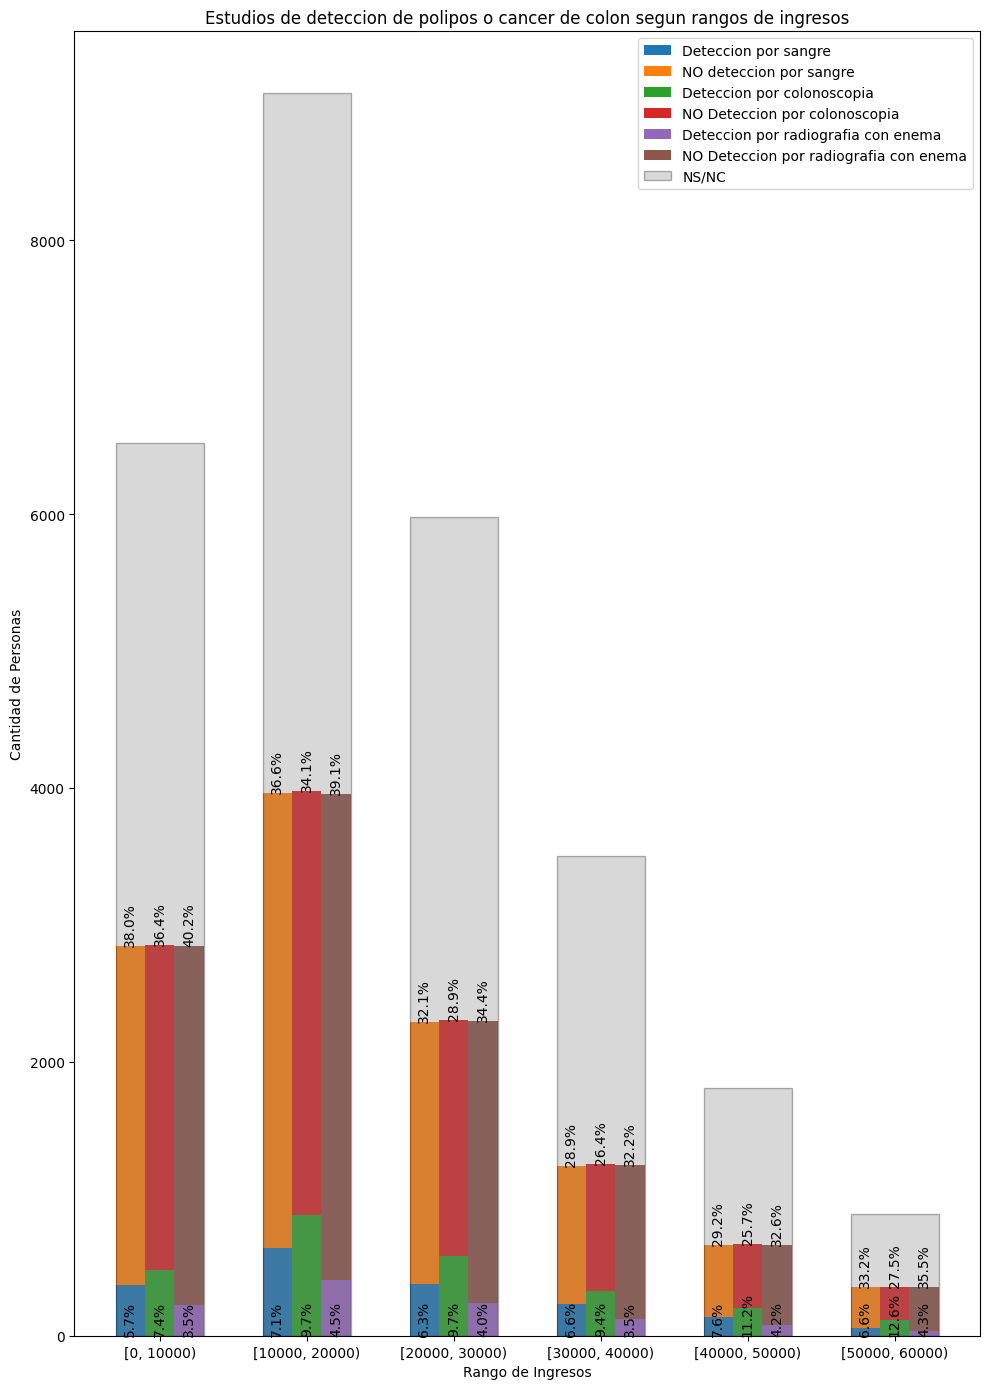

In [ ]:
# Definir los límites de los rangos de ingresos
rangos = [0, 10000, 20000, 30000, 40000, 50000, 60000]

# Crear una nueva columna con los rangos de ingresos
df_pregunta_1['Rango de ingresos'] = pd.cut(df_pregunta_1['bhih01'], bins=rangos, right=False)

# Filtrar las filas con las condiciones deseada
filtered_df_1 = df_pregunta_1[((df_pregunta_1['bicc01_01'] == 1) | (df_pregunta_1['bicc01_02'] == 1) | (df_pregunta_1['bicc01_03'] == 1))]
filtered_df_2 = df_pregunta_1[((df_pregunta_1['bicc01_01'] ==2) | (df_pregunta_1['bicc01_02'] ==2) | (df_pregunta_1['bicc01_03'] ==2))]

# Contar la cantidad de personas en cada rango de ingresos para cada variable
counts_bicc01_01 = filtered_df_1[filtered_df_1['bicc01_01'] == 1].groupby('Rango de ingresos').size().tolist()
counts_bicc01_02 = filtered_df_1[filtered_df_1['bicc01_02'] == 1].groupby('Rango de ingresos').size().tolist()
counts_bicc01_03 = filtered_df_1[filtered_df_1['bicc01_03'] == 1].groupby('Rango de ingresos').size().tolist()
counts_bicc01_01_not = filtered_df_2[filtered_df_2['bicc01_01'] ==2].groupby('Rango de ingresos').size().tolist()
counts_bicc01_02_not = filtered_df_2[filtered_df_2['bicc01_02'] ==2].groupby('Rango de ingresos').size().tolist()
counts_bicc01_03_not = filtered_df_2[filtered_df_2['bicc01_03'] ==2].groupby('Rango de ingresos').size().tolist()

# Calcular los totales de personas por rango de ingresos sin condiciones
total_counts = df_pregunta_1.groupby('Rango de ingresos').size()

# Convertir los intervalos a cadenas de texto
x_labels = [str(interval) for interval in total_counts.index]

# Ancho de las barras
bar_width = 0.2

# Ajustar la posición de las barras
bar_positions = np.arange(len(x_labels))

# Crear el gráfico de barras con barras una al lado de la otra
plt.figure(figsize=(10, 14))

# Definir la paleta de colores "tab20c"
colors = sns.color_palette('tab10')

plt.bar(bar_positions - bar_width, counts_bicc01_01, label='Deteccion por sangre', color=colors[0], width=bar_width)
plt.bar(bar_positions - bar_width, counts_bicc01_01_not, label='NO deteccion por sangre', bottom=counts_bicc01_01,color=colors[1], width=bar_width)
plt.bar(bar_positions, counts_bicc01_02, label='Deteccion por colonoscopia', color=colors[2], width=bar_width)
plt.bar(bar_positions, counts_bicc01_02_not, label='NO Deteccion por colonoscopia', bottom=counts_bicc01_02, color=colors[3], width=bar_width)
plt.bar(bar_positions + bar_width, counts_bicc01_03, label='Deteccion por radiografia con enema', color=colors[4], width=bar_width)
plt.bar(bar_positions + bar_width, counts_bicc01_03_not, label='NO Deteccion por radiografia con enema', bottom=counts_bicc01_03, color=colors[5], width=bar_width)

# Superponer la barra de totales de personas por rango de ingresos
plt.bar(x_labels, total_counts, label='NS/NC', color='gray', alpha=0.3, width=0.6, align='center', edgecolor='black')

# Agregar porcentajes encima de las barras
for i in range(len(x_labels)):
    total_list = total_counts.tolist()
    plt.text(bar_positions[i] - bar_width, 0, f'{counts_bicc01_01[i] / total_list[i] * 100:.1f}%', ha='center', va='bottom', color='black', rotation='vertical')
    plt.text(bar_positions[i] - bar_width, counts_bicc01_01[i]+counts_bicc01_01_not[i], f'{counts_bicc01_01_not[i] / total_list[i] * 100:.1f}%', ha='center', va='bottom', color='black', rotation='vertical')
    plt.text(bar_positions[i], 0, f'{counts_bicc01_02[i] / total_list[i] * 100:.1f}%', ha='center', va='bottom', color='black', rotation='vertical')
    plt.text(bar_positions[i], counts_bicc01_02[i]+counts_bicc01_02_not[i], f'{counts_bicc01_02_not[i] / total_list[i] * 100:.1f}%', ha='center', va='bottom', color='black', rotation='vertical')
    plt.text(bar_positions[i] + bar_width, 0, f'{counts_bicc01_03[i] / total_list[i] * 100:.1f}%', ha='center', va='bottom', color='black', rotation='vertical')
    plt.text(bar_positions[i] + bar_width, counts_bicc01_03[i]+counts_bicc01_03_not[i], f'{counts_bicc01_03_not[i] / total_list[i] * 100:.1f}%', ha='center', va='bottom', color='black', rotation='vertical')

# Agregar título y etiquetas de los ejes
plt.title("Estudios de deteccion de polipos o cancer de colon segun rangos de ingresos")
plt.xlabel("Rango de Ingresos")
plt.ylabel("Cantidad de Personas")

# Ajustar la posición de los ticks del eje x
plt.xticks(bar_positions, x_labels, rotation=0, ha='center')

# Agregar leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


### 2. Estudios de la mujer

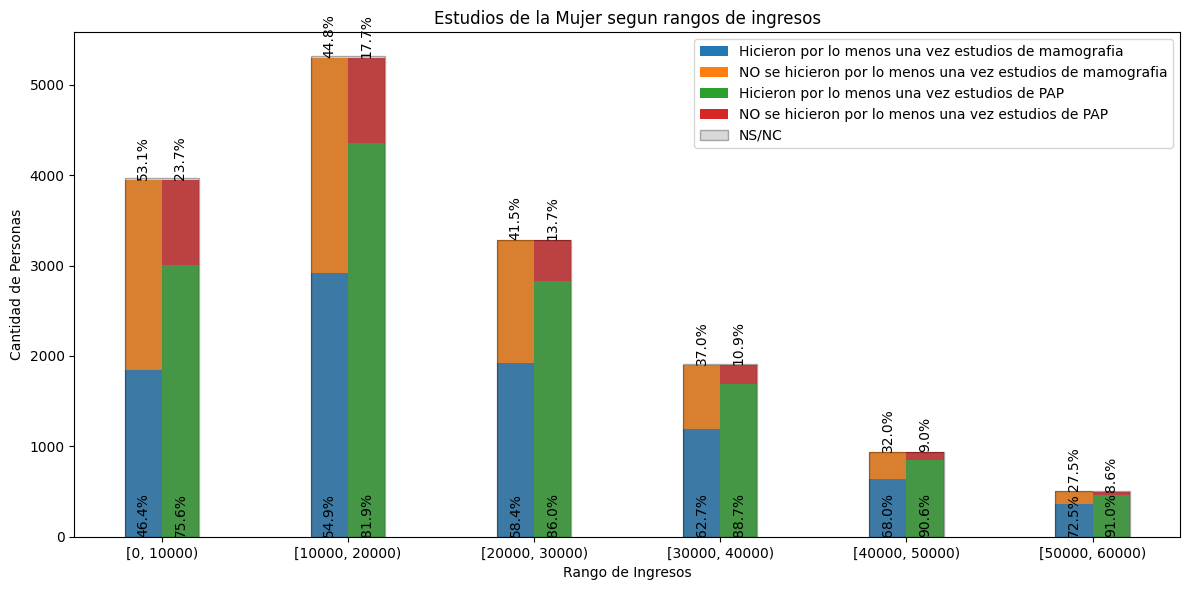

In [ ]:
# Filtrar las filas con las condiciones deseadas
filtered_df_1 = df_pregunta_1[(df_pregunta_1['bipp01'] == 1)]
filtered_df_2 = df_pregunta_1[(df_pregunta_1['bipp03'] == 1)]
filtered_df_3 = df_pregunta_1[(df_pregunta_1['bipp01'] == 2)]
filtered_df_4 = df_pregunta_1[(df_pregunta_1['bipp03'] == 2)]

# Contar la cantidad de personas en cada rango de ingresos para cada variable
counts_bipp01 = filtered_df_1.groupby('Rango de ingresos').size().tolist()
counts_bipp03 = filtered_df_2.groupby('Rango de ingresos').size().tolist()
counts_bipp01_not = filtered_df_3.groupby('Rango de ingresos').size().tolist()
counts_bipp03_not = filtered_df_4.groupby('Rango de ingresos').size().tolist()

# Calcular los totales de personas por rango de ingresos sin condiciones

total_counts = df_pregunta_1[df_pregunta_1['bhch03'] == 2].groupby('Rango de ingresos').size()

# Convertir los intervalos a cadenas de texto
x_labels = [str(interval) for interval in total_counts.index]

# Ancho de las barras
bar_width = 0.2

# Ajustar la posición de las barras
bar_positions = np.arange(len(x_labels))

# Crear el gráfico de barras con barras una al lado de la otra
plt.figure(figsize=(12, 6))

# Definir la paleta de colores "tab20c"
colors = sns.color_palette('tab10')

plt.bar(bar_positions - bar_width/2, counts_bipp01, label='Hicieron por lo menos una vez estudios de mamografia', color=colors[0], width=bar_width)
plt.bar(bar_positions - bar_width/2, counts_bipp01_not, label='NO se hicieron por lo menos una vez estudios de mamografia', bottom=counts_bipp01, color=colors[1], width=bar_width)
plt.bar(bar_positions + bar_width/2, counts_bipp03, label='Hicieron por lo menos una vez estudios de PAP', color=colors[2], width=bar_width)
plt.bar(bar_positions + bar_width/2, counts_bipp03_not, label='NO se hicieron por lo menos una vez estudios de PAP',bottom=counts_bipp03, color=colors[3], width=bar_width)

# Superponer la barra de totales de personas por rango de ingresos
plt.bar(x_labels, total_counts, label='NS/NC', color='gray', alpha=0.3, width=0.4, align='center', edgecolor='black')

# Agregar porcentajes encima de las barras
for i in range(len(x_labels)):
    total_list = total_counts.tolist()
    plt.text(bar_positions[i] - bar_width/2, 0, f'{counts_bipp01[i] / total_list[i] * 100:.1f}%', ha='center', va='bottom', color='black', rotation='vertical')
    plt.text(bar_positions[i] - bar_width/2, counts_bipp01[i]+counts_bipp01_not[i], f'{counts_bipp01_not[i] / total_list[i] * 100:.1f}%', ha='center', va='bottom', color='black', rotation='vertical')
    plt.text(bar_positions[i] + bar_width/2, 0, f'{counts_bipp03[i] / total_list[i] * 100:.1f}%', ha='center', va='bottom', color='black', rotation='vertical')
    plt.text(bar_positions[i] + bar_width/2, counts_bipp03[i]+counts_bipp03_not[i], f'{counts_bipp03_not[i] / total_list[i] * 100:.1f}%', ha='center', va='bottom', color='black', rotation='vertical')

# Agregar título y etiquetas de los ejes
plt.title("Estudios de la Mujer segun rangos de ingresos")
plt.xlabel("Rango de Ingresos")
plt.ylabel("Cantidad de Personas")

# Ajustar la posición de los ticks del eje x
plt.xticks(bar_positions, x_labels, rotation=0, ha='center')

# Agregar leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


### 3. Factores de riesgo Comportamentales Modif:

#### Hábitos Alimenticios: Consumo de sal, frutas y verduras

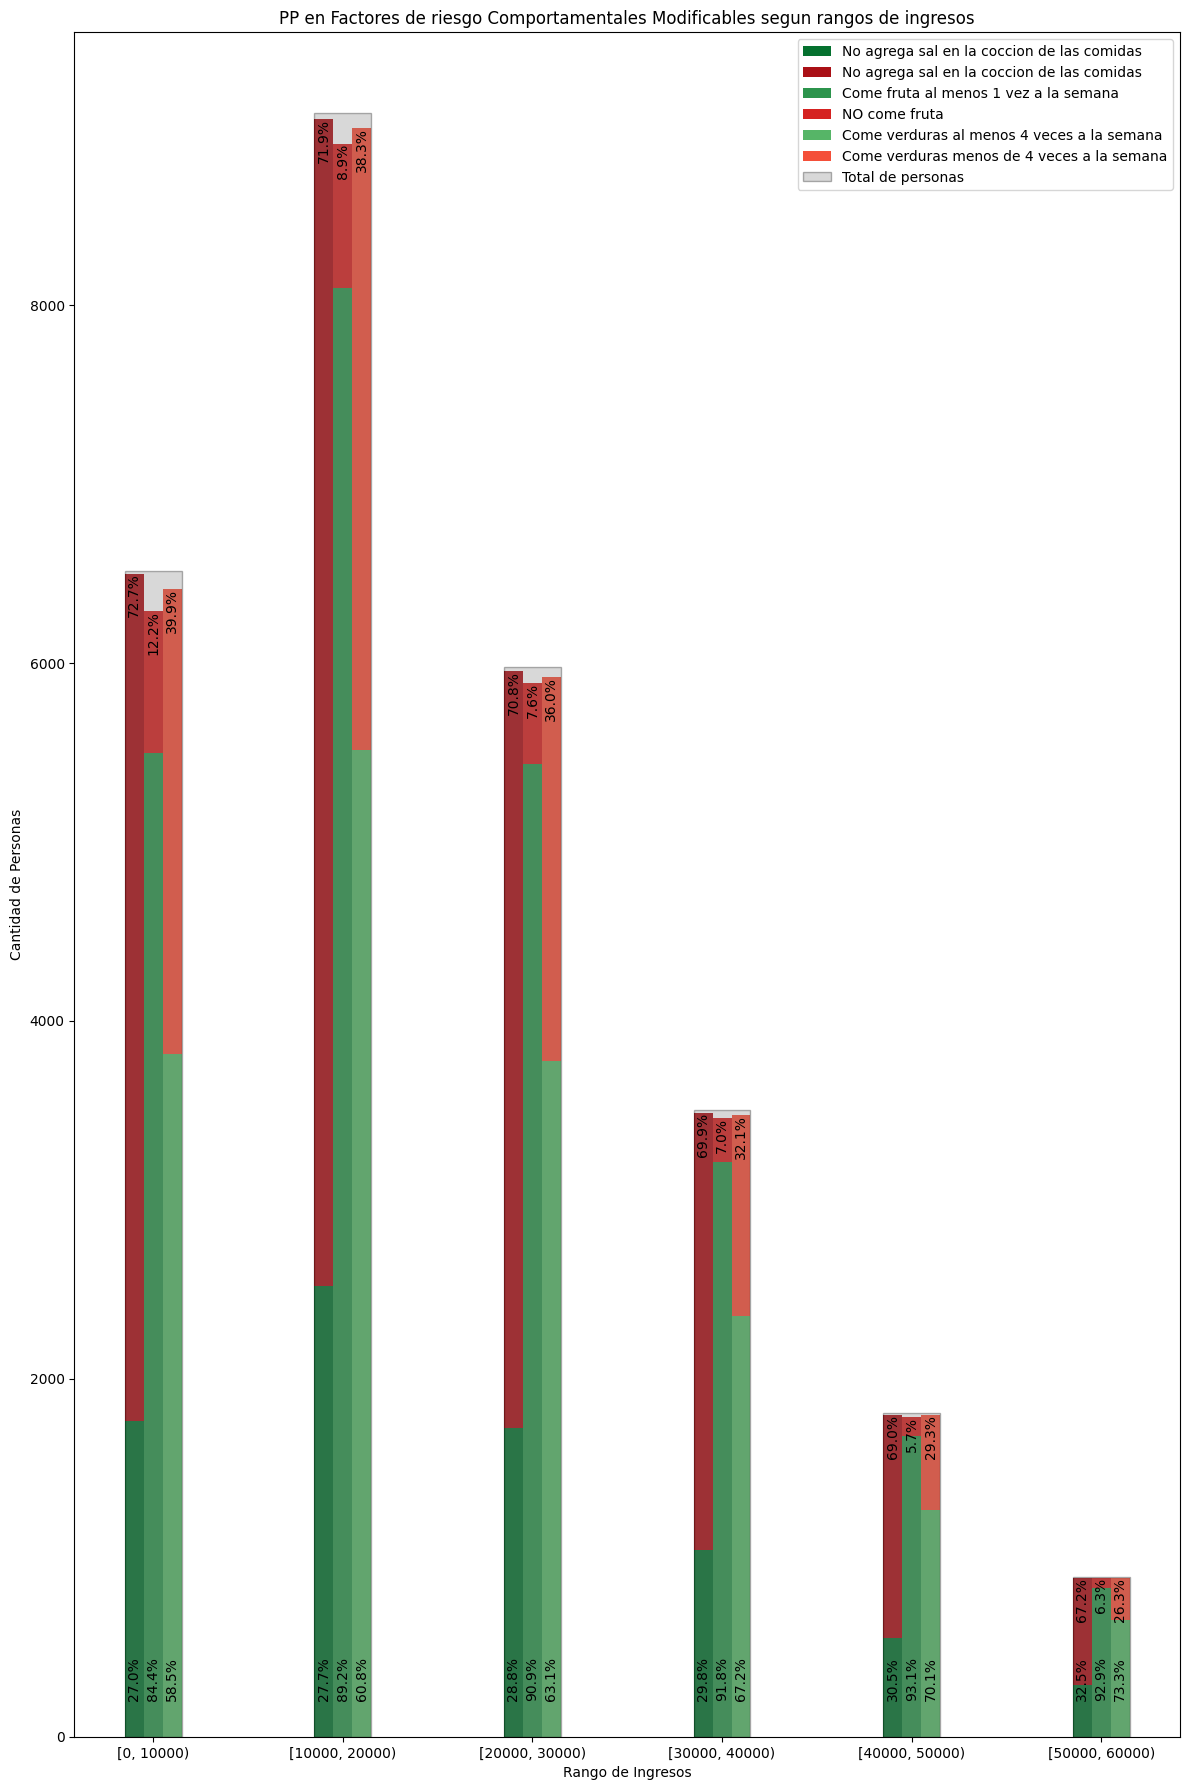

In [ ]:
##Factores Comportamentales Modificables: Alimenticios
# Filtrar las filas con las condiciones deseadas
filtered_df_4 = df_pregunta_1[(df_pregunta_1['bial01'] == 2)]
filtered_df_5 = df_pregunta_1[(df_pregunta_1['bial03'] >= 1)]
filtered_df_6 = df_pregunta_1[(df_pregunta_1['bial05'] >= 4)]
filtered_df_4_not = df_pregunta_1[(df_pregunta_1['bial01'] == 1)]
filtered_df_5_not = df_pregunta_1[(df_pregunta_1['bial03'] == 0)]
filtered_df_6_not = df_pregunta_1[(df_pregunta_1['bial05'] < 4)]

counts_bial01 = filtered_df_4.groupby('Rango de ingresos').size().tolist()
counts_bial03 = filtered_df_5.groupby('Rango de ingresos').size().tolist()
counts_bial05 = filtered_df_6.groupby('Rango de ingresos').size().tolist()
counts_bial01_not = filtered_df_4_not.groupby('Rango de ingresos').size().tolist()
counts_bial03_not = filtered_df_5_not.groupby('Rango de ingresos').size().tolist()
counts_bial05_not = filtered_df_6_not.groupby('Rango de ingresos').size().tolist()


# Calcular los totales de personas por rango de ingresos sin condiciones
total_counts = df_pregunta_1.groupby('Rango de ingresos').size()

# Convertir los intervalos a cadenas de texto
x_labels = [str(interval) for interval in total_counts.index]

# Ancho de las barras
bar_width = 0.1

# Ajustar la posición de las barras
bar_positions = np.arange(len(x_labels))

# Crear el gráfico de barras con barras una al lado de la otra
plt.figure(figsize=(12, 18))

# Definir la paleta de colores tono pastel
colors = sns.color_palette('Greens_r')
colors2= sns.color_palette('Reds_r')

plt.bar(bar_positions  - bar_width, counts_bial01, label='No agrega sal en la coccion de las comidas', color=colors[0], width=bar_width)
plt.bar(bar_positions  - bar_width, counts_bial01_not, label='No agrega sal en la coccion de las comidas', bottom=counts_bial01, color=colors2[0], width=bar_width)
plt.bar(bar_positions, counts_bial03, label='Come fruta al menos 1 vez a la semana', color=colors[1], width=bar_width)
plt.bar(bar_positions, counts_bial03_not, label='NO come fruta', bottom=counts_bial03, color=colors2[1], width=bar_width)
plt.bar(bar_positions +  bar_width, counts_bial05, label='Come verduras al menos 4 veces a la semana', color=colors[2], width=bar_width)
plt.bar(bar_positions +  bar_width, counts_bial05_not, label='Come verduras menos de 4 veces a la semana', bottom=counts_bial05, color=colors2[2], width=bar_width)

# Superponer la barra de totales de personas por rango de ingresos
plt.bar(x_labels, total_counts, label='Total de personas', color='gray', alpha=0.3, width=0.3, align='center', edgecolor='black')

# Agregar porcentajes encima de las barras
for i in range(len(x_labels)):
    total = total_counts.tolist()
    plt.text(bar_positions[i] - bar_width, 200, f'{counts_bial01[i] / total[i] * 100:.1f}%', ha='center', va='bottom', color='black', rotation='vertical')
    plt.text(bar_positions[i] - bar_width, counts_bial01_not[i]+counts_bial01[i], f'{counts_bial01_not[i] / total[i] * 100:.1f}%', ha='center', va='top', color='black', rotation='vertical')
    plt.text(bar_positions[i], 200, f'{counts_bial03[i] / total[i] * 100:.1f}%', ha='center', va='bottom', color='black', rotation='vertical')
    plt.text(bar_positions[i], counts_bial03_not[i]+counts_bial03[i], f'{counts_bial03_not[i] / total[i] * 100:.1f}%', ha='center', va='top', color='black', rotation='vertical')
    plt.text(bar_positions[i] + bar_width, 200, f'{counts_bial05[i] / total[i] * 100:.1f}%', ha='center', va='bottom', color='black', rotation='vertical')
    plt.text(bar_positions[i] + bar_width, counts_bial05_not[i]+counts_bial05[i], f'{counts_bial05_not[i] / total[i] * 100:.1f}%', ha='center', va='top', color='black', rotation='vertical')

# Agregar título y etiquetas de los ejes
plt.title("PP en Factores de riesgo Comportamentales Modificables segun rangos de ingresos")
plt.xlabel("Rango de Ingresos")
plt.ylabel("Cantidad de Personas")

# Ajustar la posición de los ticks del eje x
plt.xticks(bar_positions, x_labels, rotation=0, ha='center')

# Agregar leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### Actividad Física y Control de Peso

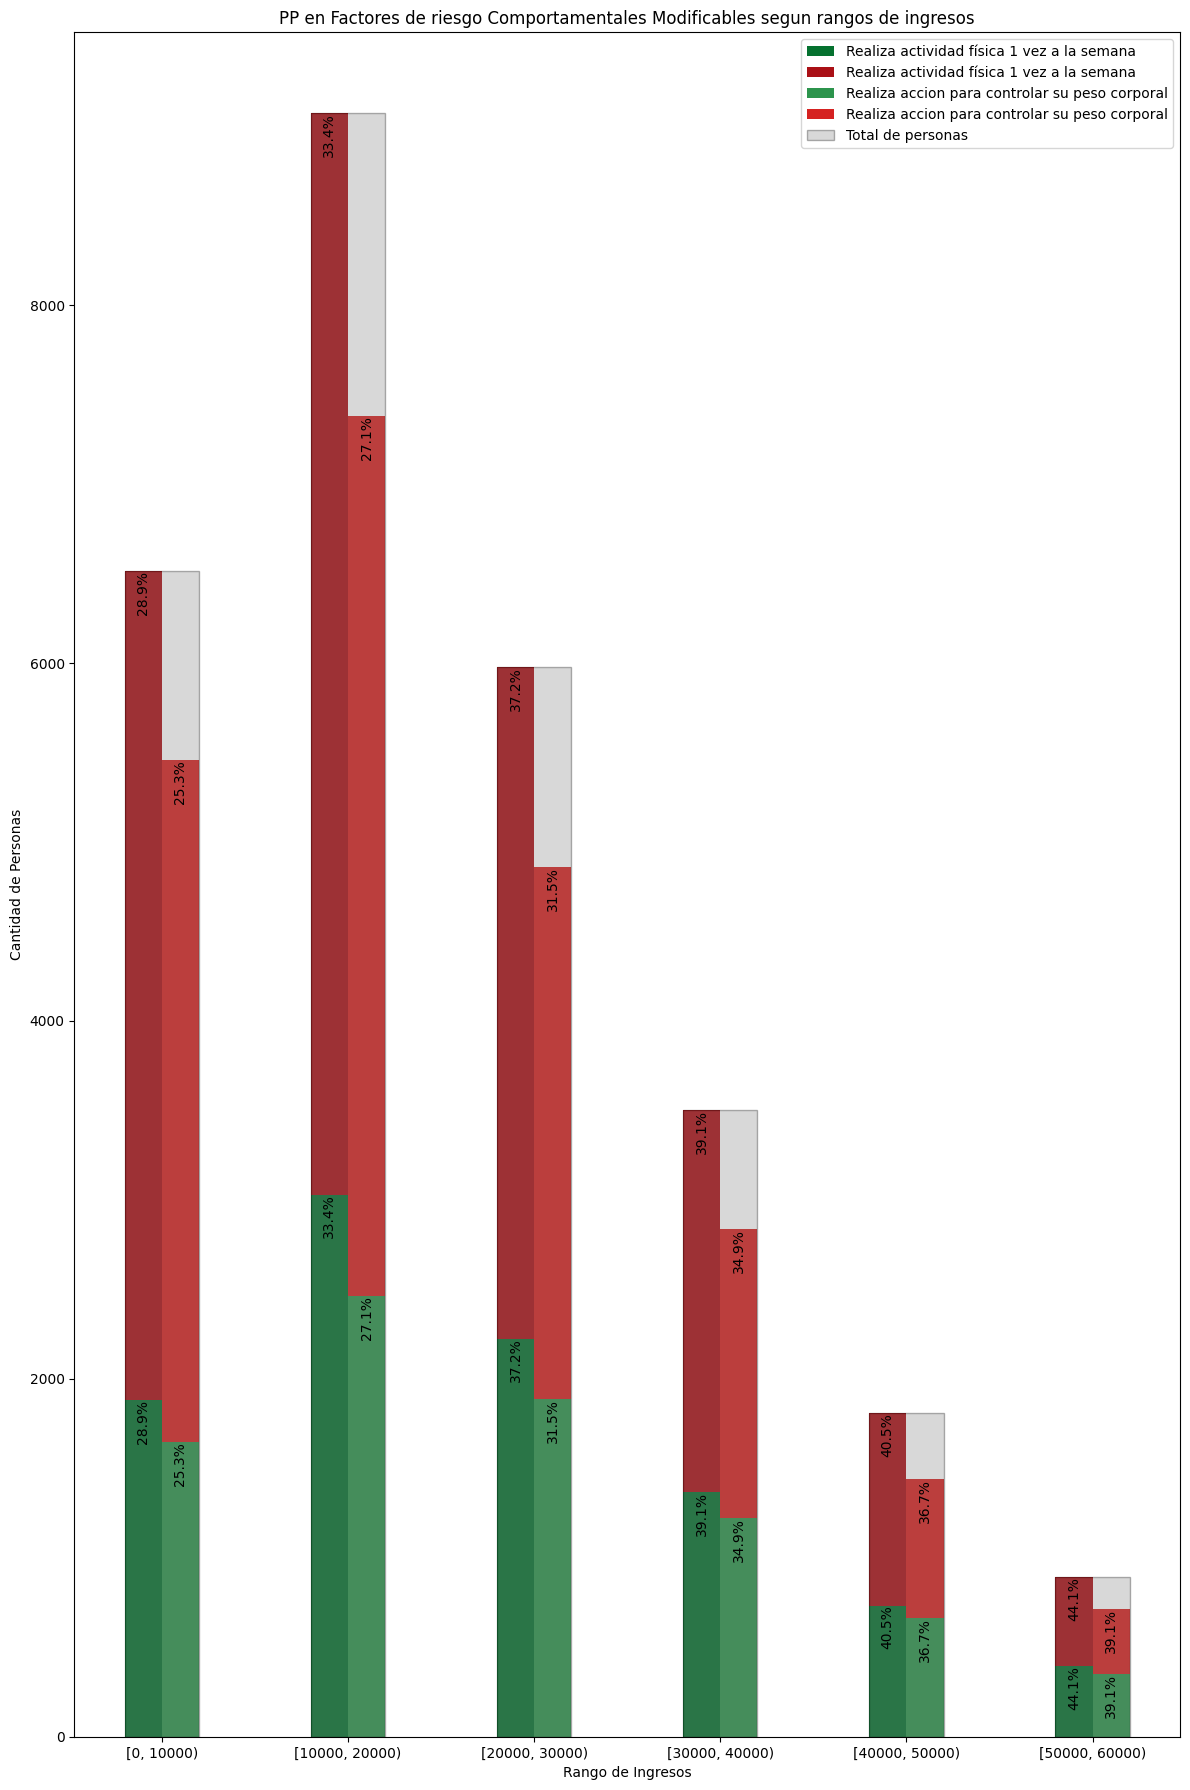

In [ ]:
##Factores Comportamentales Modificables: Activiad Fisica y Control de Peso
# Filtrar las filas con las condiciones deseadas
filtered_df_1 = df_pregunta_1[(df_pregunta_1['biaf03'] >= 1)]
filtered_df_7 = df_pregunta_1[(df_pregunta_1['bipc03'] == 1)]
filtered_df_1_not = df_pregunta_1[(df_pregunta_1['biaf03'] == 0)]
filtered_df_7_not = df_pregunta_1[(df_pregunta_1['bipc03'] == 2)]

counts_biaf03 = filtered_df_1.groupby('Rango de ingresos').size().tolist()
counts_bipc03 = filtered_df_7.groupby('Rango de ingresos').size().tolist()
counts_biaf03_not = filtered_df_1_not.groupby('Rango de ingresos').size().tolist()
counts_bipc03_not = filtered_df_7_not.groupby('Rango de ingresos').size().tolist()


# Calcular los totales de personas por rango de ingresos sin condiciones
total_counts = df_pregunta_1.groupby('Rango de ingresos').size()

# Convertir los intervalos a cadenas de texto
x_labels = [str(interval) for interval in total_counts.index]

# Ancho de las barras
bar_width = 0.2

# Ajustar la posición de las barras
bar_positions = np.arange(len(x_labels))

# Crear el gráfico de barras con barras una al lado de la otra
plt.figure(figsize=(12, 18))

# Definir la paleta de colores tono pastel
colors = sns.color_palette('Greens_r')
colors2= sns.color_palette('Reds_r')

plt.bar(bar_positions - bar_width/2, counts_biaf03, label='Realiza actividad física 1 vez a la semana', color=colors[0], width=bar_width)
plt.bar(bar_positions - bar_width/2, counts_biaf03_not, label='Realiza actividad física 1 vez a la semana', bottom=counts_biaf03,color=colors2[0], width=bar_width)
plt.bar(bar_positions + bar_width/2, counts_bipc03, label='Realiza accion para controlar su peso corporal', color=colors[1], width=bar_width)
plt.bar(bar_positions + bar_width/2, counts_bipc03_not, label='Realiza accion para controlar su peso corporal', bottom=counts_bipc03, color=colors2[1], width=bar_width)

# Superponer la barra de totales de personas por rango de ingresos
plt.bar(x_labels, total_counts, label='Total de personas', color='gray', alpha=0.3, width=0.4, align='center', edgecolor='black')

# Agregar porcentajes encima de las barras
for i in range(len(x_labels)):
    total = total_counts.tolist()
    plt.text(bar_positions[i] - bar_width/2, counts_biaf03[i], f'{counts_biaf03[i] / total[i] * 100:.1f}%', ha='center', va='top', color='black', rotation='vertical')
    plt.text(bar_positions[i] - bar_width/2, counts_biaf03_not[i]+counts_biaf03[i], f'{counts_biaf03[i] / total[i] * 100:.1f}%', ha='center', va='top', color='black', rotation='vertical')
    plt.text(bar_positions[i] + bar_width/2, counts_bipc03[i], f'{counts_bipc03[i] / total[i] * 100:.1f}%', ha='center', va='top', color='black', rotation='vertical')
    plt.text(bar_positions[i] + bar_width/2, counts_bipc03_not[i]+counts_bipc03[i], f'{counts_bipc03[i] / total[i] * 100:.1f}%', ha='center', va='top', color='black', rotation='vertical')

# Agregar título y etiquetas de los ejes
plt.title("PP en Factores de riesgo Comportamentales Modificables segun rangos de ingresos")
plt.xlabel("Rango de Ingresos")
plt.ylabel("Cantidad de Personas")

# Ajustar la posición de los ticks del eje x
plt.xticks(bar_positions, x_labels, rotation=0, ha='center')

# Agregar leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### Tabaco y Alcohol

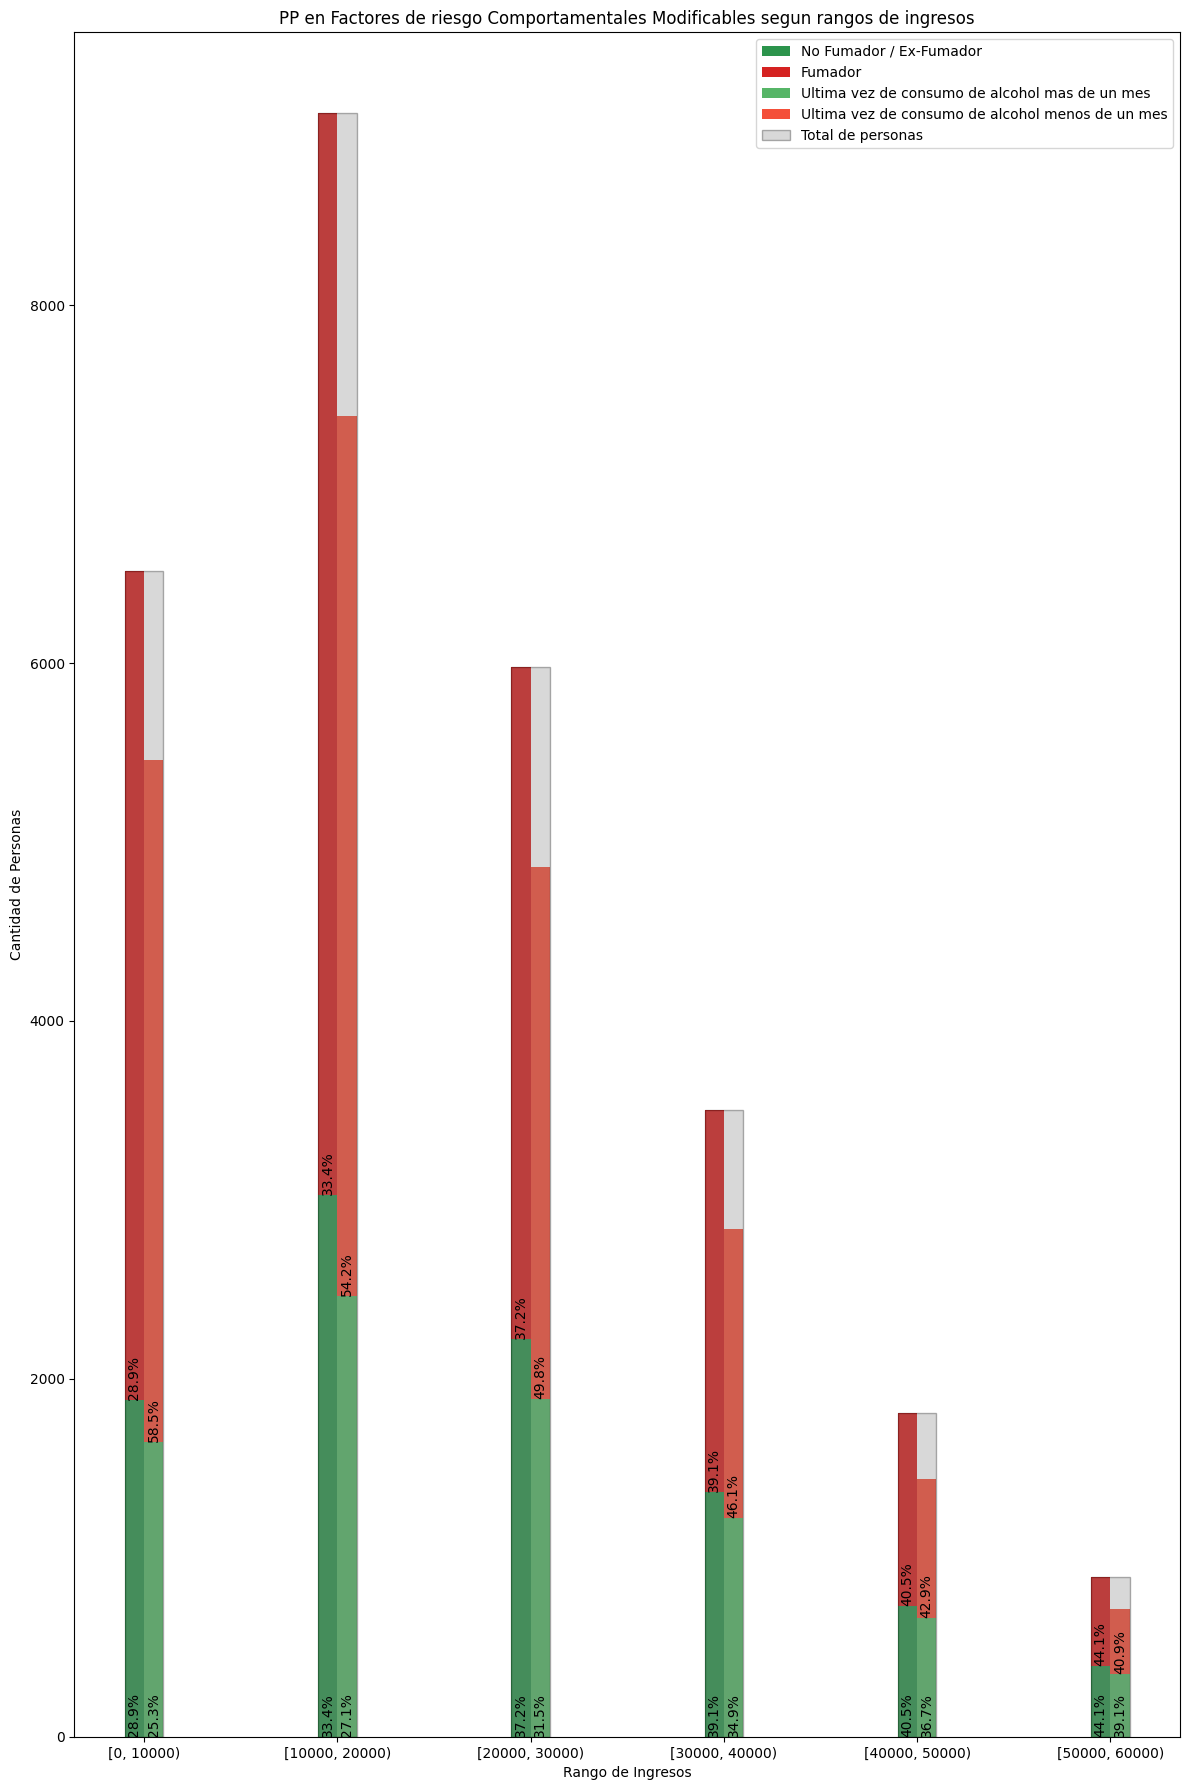

In [ ]:
##Factores Comportamentales Modificables: Tabaco y Alcohol
# Filtrar las filas con las condiciones deseadas
filtered_df_2 = df_pregunta_1[(df_pregunta_1['consumo_tabaco_100'].isin([2, 3]))]
filtered_df_3 = df_pregunta_1[(df_pregunta_1['bica02'].isin([2, 3]))]
filtered_df_2_not = df_pregunta_1[(df_pregunta_1['consumo_tabaco_100'] == 1)]
filtered_df_3_not = df_pregunta_1[(df_pregunta_1['bica02'] == 1)]

counts_consumo_tabaco = filtered_df_1.groupby('Rango de ingresos').size().tolist()
counts_bica02 = filtered_df_7.groupby('Rango de ingresos').size().tolist()
counts_consumo_tabaco_not = filtered_df_1_not.groupby('Rango de ingresos').size().tolist()
counts_bica02_not = filtered_df_7_not.groupby('Rango de ingresos').size().tolist()

# Calcular los totales de personas por rango de ingresos sin condiciones
total_counts = df_pregunta_1.groupby('Rango de ingresos').size()

# Convertir los intervalos a cadenas de texto
x_labels = [str(interval) for interval in total_counts.index]

# Ancho de las barras
bar_width = 0.1

# Ajustar la posición de las barras
bar_positions = np.arange(len(x_labels))

# Crear el gráfico de barras con barras una al lado de la otra
plt.figure(figsize=(12, 18))

# Definir la paleta de colores tono pastel
colors = sns.color_palette('Greens_r')
colors2= sns.color_palette('Reds_r')

plt.bar(bar_positions - 0.5 * bar_width, counts_consumo_tabaco, label='No Fumador / Ex-Fumador', color=colors[1], width=bar_width)
plt.bar(bar_positions - 0.5 * bar_width, counts_consumo_tabaco_not, label='Fumador', bottom=counts_consumo_tabaco, color=colors2[1], width=bar_width)
plt.bar(bar_positions + 0.5 * bar_width, counts_bica02, label='Ultima vez de consumo de alcohol mas de un mes', color=colors[2], width=bar_width)
plt.bar(bar_positions + 0.5 * bar_width, counts_bica02_not, label='Ultima vez de consumo de alcohol menos de un mes',bottom=counts_bica02, color=colors2[2], width=bar_width)

# Superponer la barra de totales de personas por rango de ingresos
plt.bar(x_labels, total_counts, label='Total de personas', color='gray', alpha=0.3, width=0.2, align='center', edgecolor='black')

# Agregar porcentajes encima de las barras
for i in range(len(x_labels)):
    total = total_counts.tolist()
    plt.text(bar_positions[i] - 0.5 * bar_width, 0, f'{counts_consumo_tabaco[i] / total[i] * 100:.1f}%', ha='center', va='bottom', color='black', rotation='vertical')
    plt.text(bar_positions[i] - 0.5 * bar_width, counts_consumo_tabaco[i], f'{counts_consumo_tabaco[i] / total[i] * 100:.1f}%', ha='center', va='bottom', color='black', rotation='vertical')
    plt.text(bar_positions[i] + 0.5 * bar_width, 0, f'{counts_bica02[i] / total[i] * 100:.1f}%', ha='center', va='bottom', color='black', rotation='vertical')
    plt.text(bar_positions[i] + 0.5 * bar_width, counts_bica02[i], f'{counts_bica02_not[i] / total[i] * 100:.1f}%', ha='center', va='bottom', color='black', rotation='vertical')

# Agregar título y etiquetas de los ejes
plt.title("PP en Factores de riesgo Comportamentales Modificables segun rangos de ingresos")
plt.xlabel("Rango de Ingresos")
plt.ylabel("Cantidad de Personas")

# Ajustar la posición de los ticks del eje x
plt.xticks(bar_positions, x_labels, rotation=0, ha='center')

# Agregar leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

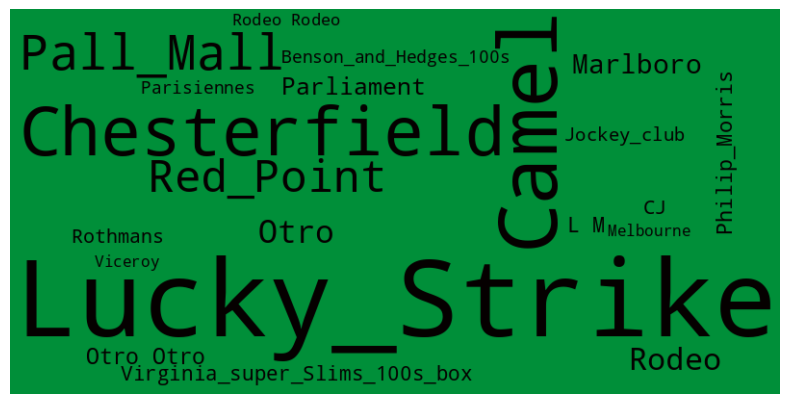

In [ ]:
# change the value to black
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")
# Crear el diccionario de mapeo de números a nombres
mapeo = {
    1: 'Lucky_Strike',
    2: 'Camel',
    3: 'Pall_Mall',
    4: 'Marlboro',
    5: 'Philip_Morris',
    6: '43/70',
    7: 'Baltimore',
    8: 'Bashia',
    9: 'Benson_and_Hedges_100s',
    10: 'Chesterfield',
    11: 'CJ',
    12: 'Dunhill_fine_cut_master',
    13: 'Freeport_box',
    14: 'Gavilán',
    15: 'Gitanes_blondes',
    16: 'Gudang_Gararm',
    17: 'Imparciales_100s',
    18: 'Inter_gold',
    19: 'Jockey_club',
    20: 'John_Player_gold_leaf',
    21: 'L&M',
    22: 'Melbourne',
    23: 'Milenio',
    24: 'Paladium',
    25: 'Parisiennes',
    26: 'Parliament',
    27: 'Particulares',
    28: 'Red_Point',
    29: 'Rodeo',
    30: 'Rothmans',
    31: 'V8',
    32: 'Viceroy',
    33: 'Virginia_super_Slims_100s_box',
    34: 'Winston',
    35: 'Otro'
}

# Mapear los números a los nombres en la variable 'bita05'
df['bita05_map'] = df['bita05'].map(mapeo)

# Concatenar todos los textos de la variable 'bita05'
text = ' '.join(df['bita05_map'].dropna().astype(str).tolist())

# Crear la WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='#008f39', min_font_size=16, max_font_size=300).generate(text)
wordcloud.recolor(color_func = black_color_func)
# Configurar el tamaño de la figura
plt.figure(figsize=(8, 5))

# Mostrar la WordCloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()

# Mostrar la figura
plt.show()

### 4. Factores de Riesgos Metabolicos

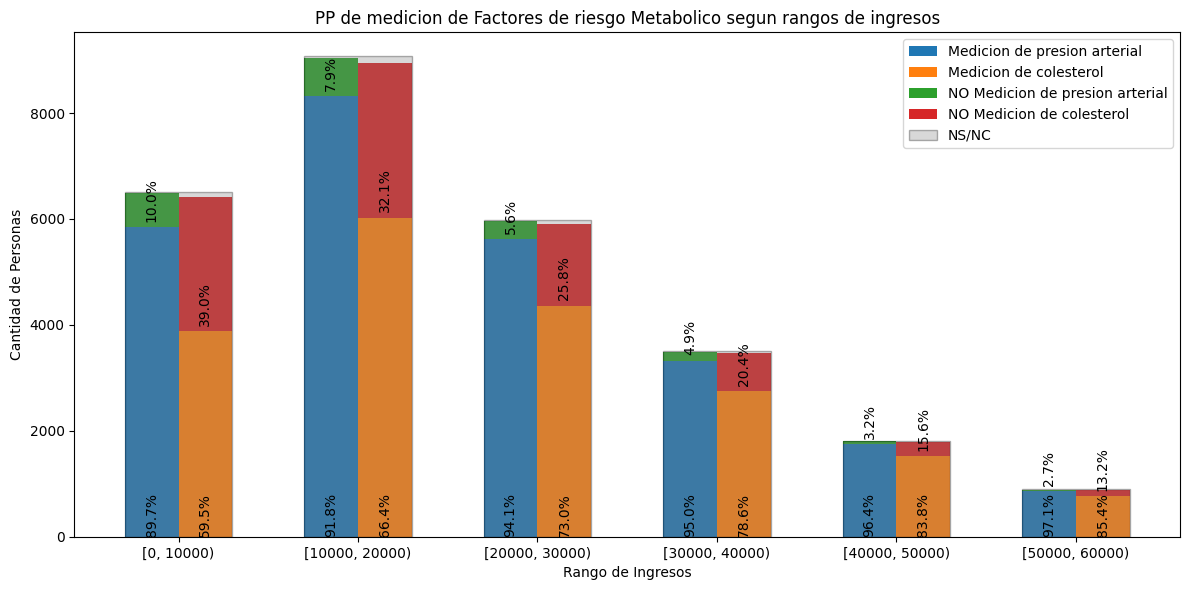

In [ ]:
##Factores de Riesgo Metabolicos: Presion Arterial y Colesterol en sangre
# Filtrar las filas con las condiciones deseadas
filtered_df_1 = df_pregunta_1[(df_pregunta_1['biha01'] == 1)]
filtered_df_2 = df_pregunta_1[(df_pregunta_1['bico01'] == 1)]
filtered_df_1_not = df_pregunta_1[(df_pregunta_1['biha01'] == 2)]
filtered_df_2_not = df_pregunta_1[(df_pregunta_1['bico01'] == 2)]

# Contar la cantidad de personas en cada rango de ingresos para cada variable
counts_biha01 = filtered_df_1.groupby('Rango de ingresos').size().tolist()
counts_bico01 = filtered_df_2.groupby('Rango de ingresos').size().tolist()
counts_biha01_not = filtered_df_1_not.groupby('Rango de ingresos').size().tolist()
counts_bico01_not = filtered_df_2_not.groupby('Rango de ingresos').size().tolist()

# Calcular los totales de personas por rango de ingresos sin condiciones
total_counts = df_pregunta_1.groupby('Rango de ingresos').size()

# Convertir los intervalos a cadenas de texto
x_labels = [str(interval) for interval in total_counts.index]

# Ancho de las barras
bar_width = 0.3

# Crear el gráfico de barras con barras una al lado de la otra
plt.figure(figsize=(12, 6))

# Ajustar la posición de las barras
bar_positions = np.arange(len(x_labels))

# Definir la paleta de colores
colors = sns.color_palette('tab10')

plt.bar(bar_positions - bar_width/2, counts_biha01, label='Medicion de presion arterial', color=colors[0], width=bar_width)
plt.bar(bar_positions + bar_width/2, counts_bico01, label='Medicion de colesterol', color=colors[1], width=bar_width)
plt.bar(bar_positions - bar_width/2, counts_biha01_not, label='NO Medicion de presion arterial', bottom=counts_biha01,color=colors[2], width=bar_width)
plt.bar(bar_positions + bar_width/2, counts_bico01_not, label='NO Medicion de colesterol', bottom=counts_bico01, color=colors[3], width=bar_width)

# Superponer la barra de totales de personas por rango de ingresos
plt.bar(x_labels, total_counts, label='NS/NC', color='gray', alpha=0.3, width=0.6, align='center', edgecolor='black')

# Agregar porcentajes encima de las barras
for i in range(len(x_labels)):
    total_counts_list = total_counts.tolist()
    plt.text(bar_positions[i] - bar_width/2, 0, f'{(counts_biha01[i] / total_counts_list[i]) * 100:.1f}%', ha='center', va='bottom', color='black', rotation='vertical')
    plt.text(bar_positions[i] + bar_width/2, 0, f'{(counts_bico01[i] / total_counts_list[i]) * 100:.1f}%', ha='center', va='bottom', color='black', rotation='vertical')
    plt.text(bar_positions[i] - bar_width/2, counts_biha01[i]+100, f'{(counts_biha01_not[i] / total_counts_list[i]) * 100:.1f}%', ha='center', va='bottom', color='black', rotation='vertical')
    plt.text(bar_positions[i] + bar_width/2, counts_bico01[i]+100, f'{(counts_bico01_not[i] / total_counts_list[i]) * 100:.1f}%', ha='center', va='bottom', color='black', rotation='vertical')

# Agregar título y etiquetas de los ejes
plt.title("PP de medicion de Factores de riesgo Metabolico segun rangos de ingresos")
plt.xlabel("Rango de Ingresos")
plt.ylabel("Cantidad de Personas")

# Ajustar la posición de los ticks del eje x
plt.xticks(bar_positions, x_labels, rotation=0, ha='center')

# Agregar leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


## CONCLUSION PREGUNTA 1

---

* En Argentina, el acceso a las **prácticas preventivas** puede estar relacionado con diversos factores, entre ellos los **ingresos y el tipo de cobertura de salud** que las personas poseen. Aunque existen programas de salud pública y cobertura médica universal en el país, el sistema de salud argentino enfrenta desafíos en términos de equidad y acceso.

* En general, las personas que cuentan con ingresos más altos y tienen una obra social o medicina prepaga suelen tener un acceso más fácil a servicios de salud preventiva. Estas instituciones suelen ofrecer cobertura para chequeos médicos regulares, exámenes de detección, vacunas y otros servicios preventivos.

* Por otro lado, aquellos con menores ingresos y sin seguro de salud pueden tener dificultades para acceder a la atención preventiva. Si bien en Argentina existe un sistema de salud público, el acceso puede estar limitado debido a la falta de recursos, demoras en la atención y una alta demanda de servicios.

* Es importante destacar que el gobierno argentino ha implementado diferentes programas de prevención y promoción de la salud en todo el país, con el objetivo de garantizar un acceso más equitativo a las prácticas preventivas. Estos programas incluyen campañas de vacunación, programas de detección temprana de enfermedades y promoción de estilos de vida saludables.


---

##Pregunta 2

---

2. ¿El IMC o la variable peso se relacionan de alguna manera con las diferentes mediciones antropométricas y/o bioquímicas?

---

Se eligieron todas las variables relacionadas a esta pregunta. Sin embardo para responder seleccionamos las mas generales que nos permitian encontrar las asociaciones necesarias.

In [ ]:
df_pregunta_2 = df.loc[:,['cod_provincia','bhch03','bhch04','rango_edad','bhch03','bima03','ta_elevada','imc_bima','imc_categorias_bima',
                          'glucemia_elevada','colesterol_elevado']]
df_pregunta_2[:3]

,cod_provincia,bhch03,bhch04,rango_edad,bhch03,bima03,ta_elevada,imc_bima,imc_categorias_bima,glucemia_elevada,colesterol_elevado
0,2,1,32,2,1,1.0,1.0,3236.0,3.0,NaN,NaN
1,2,2,65,5,2,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,33,2,2,NaN,NaN,NaN,NaN,NaN,NaN




---


 Se analizo la variable Indice de Masa Corporal (IMC) con respecto a los valores medidos de **Glucemia (Glu), Tensión Arterial (TA), Colesterol (Col)**


---



Las variables seleccionadas para analizar son:
* `imc_categorias_bima:` IMC agrupado según mediciones antropométricas. 1. Bajo (<25), 2. Medio( >=25 y <30), 3. Alto ( >=30), 99. Ns/Nc.
* `ta_elevada:`Presión arterial.  1 Elevada (promedio sistolica>=140 y promedio_diastolica>=90), 2 No elevada (promedio_sistolica < 140 y promedio_diastolica < 90).
* `glucemia_elevada:` Glucemia elevada en mediciones bioquímicas. 1. Elevada (>=110), 2. No elevada(<110)
* `colesterol_elevado:` Colesterol elevado en mediciones bioquímicas. 1. Elevado (>= 200), 2. No elevado (< 200)

In [ ]:
#Indice de Masa Corporal
df_pregunta_2.imc_categorias_bima.value_counts()

2.0     5682
3.0     5460
1.0     5268
99.0     167
Name: imc_categorias_bima, dtype: int64

In [ ]:
#Tabla cruzada entre el IMC y el Colesterol medido
crosstab_1 = pd.crosstab(index=df_pregunta_2['imc_categorias_bima'],
                     columns=df_pregunta_2['colesterol_elevado'],
                     margins=True)
nombres_imc = ['Bajo (<25)a', 'Medio( >=25 y <30)', 'Alto ( >=30)',("Ns/Nc")]
nombres_colesterol = ['Elevado (>= 200)', 'No elevado (< 200)']
crosstab_1 = crosstab_1.rename(index=dict(zip(crosstab_1.index[:-1], nombres_imc)),
                       columns=dict(zip(crosstab_1.columns[:-1], nombres_colesterol)))

print(crosstab_1)

colesterol_elevado   Elevado (>= 200)  No elevado (< 200)   All
imc_categorias_bima                                            
Bajo (<25)a                       374                1197  1571
Medio( >=25 y <30)                520                1147  1667
Alto ( >=30)                      542                1092  1634
Ns/Nc                              12                  21    33
All                              1448                3457  4905


In [ ]:
#Tabla cruzada entre los porcentajes de IMC y el Colesterol medido
crosstab_2=pd.crosstab(index=df_pregunta_2['imc_categorias_bima'], columns=df_pregunta_2['colesterol_elevado']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)
nombres_imc = ['Bajo (<25)', 'Medio( >=25 y <30)', 'Alto ( >=30)',"Ns/Nc"]
nombres_colesterol = ['Elevado(>= 200)','No elevado(< 200)']

crosstab_2 = crosstab_2.rename(index=dict(zip(crosstab_2.index[:4], nombres_imc)),
                       columns=dict(zip(crosstab_2.columns[:2], nombres_colesterol)))

print(crosstab_2)

colesterol_elevado   Elevado(>= 200)  No elevado(< 200)
imc_categorias_bima                                    
Bajo (<25)                 23.806493          76.193507
Medio( >=25 y <30)         31.193761          68.806239
Alto ( >=30)               33.170135          66.829865
Ns/Nc                      36.363636          63.636364


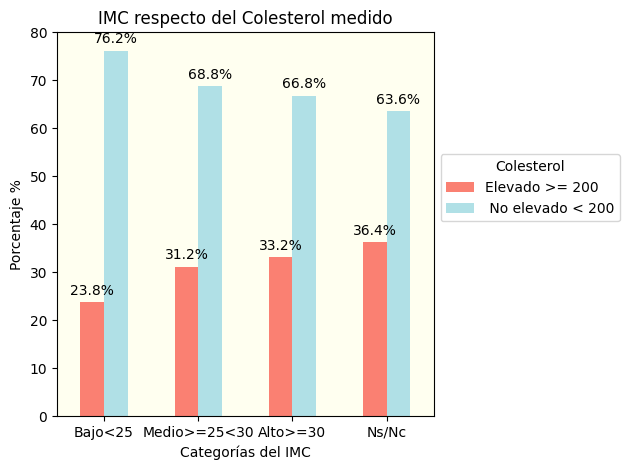

In [ ]:
#Grafico de barras porcentajes de IMC respecto al Colesterol medido
color_dict = {1: '#FA8072', 2: '#B0E0E6'}
plot = pd.crosstab(index=df_pregunta_2['imc_categorias_bima'],
            columns=df_pregunta_2['colesterol_elevado']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar',color=color_dict)

plot.set_ylabel('Porcentaje %')
plot.set_xlabel('Categorías del IMC')
plot.set_title('IMC respecto del Colesterol medido')


imc_labels = ['Bajo<25', 'Medio>=25<30', 'Alto>=30', 'Ns/Nc']
plot.set_xticklabels(imc_labels, rotation=0)

niveles_colesterol = ['Elevado >= 200', ' No elevado < 200']
plot.legend(title='Colesterol', labels=niveles_colesterol, bbox_to_anchor=(1, 0.7))
plot.set_facecolor('#FFFFF0')

for container in plot.containers:
    for rect in container:
        height = rect.get_height()
        plot.annotate(f'{height:.1f}%', xy=(rect.get_x() + rect.get_width() / 2, height),
                      xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()

---


Se observo que a medida que aumenta el **IMC** aumenta el porcentaje de personas con **colesterol elevado.**


---

In [ ]:
#Tabla cruzada entre el IMC y el valor de Glucemia medido
crosstab_3 = pd.crosstab(index=df_pregunta_2['imc_categorias_bima'],
                     columns=df_pregunta_2['glucemia_elevada'],
                     margins=True)
nombres_imc = ['Bajo (<25)a', 'Medio( >=25 y <30)', 'Alto ( >=30)',("Ns/Nc")]
nombres_glu = ['Elevada (>=110)', 'No elevada(<110)']
crosstab_3 = crosstab_3.rename(index=dict(zip(crosstab_3.index[:-1], nombres_imc)),
                       columns=dict(zip(crosstab_3.columns[:-1], nombres_glu)))

print(crosstab_3)

glucemia_elevada     Elevada (>=110)  No elevada(<110)   All
imc_categorias_bima                                         
Bajo (<25)a                       63              1609  1672
Medio( >=25 y <30)               164              1586  1750
Alto ( >=30)                     244              1478  1722
Ns/Nc                              4                35    39
All                              475              4708  5183


In [ ]:
#Tabla cruzada entre los porcentajes de IMC y el valor de Glucemia medido
crosstab_4=pd.crosstab(index=df_pregunta_2['imc_categorias_bima'], columns=df_pregunta_2['glucemia_elevada']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)
nombres_imc = ['Bajo (<25)', 'Medio( >=25 y <30)', 'Alto ( >=30)',"Ns/Nc"]
nombres_glu = ['Elevada (>=110)', 'No elevada(<110)']

crosstab_4 = crosstab_4.rename(index=dict(zip(crosstab_4.index[:4], nombres_imc)),
                       columns=dict(zip(crosstab_4.columns[:2], nombres_glu)))

print(crosstab_4)

glucemia_elevada     Elevada (>=110)  No elevada(<110)
imc_categorias_bima                                   
Bajo (<25)                  3.767943         96.232057
Medio( >=25 y <30)          9.371429         90.628571
Alto ( >=30)               14.169570         85.830430
Ns/Nc                      10.256410         89.743590


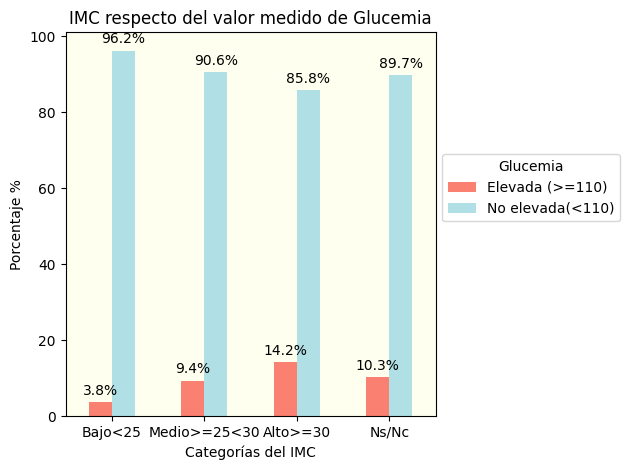

In [ ]:
#Grafico de barras porcentajes de IMC respecto al el valor de Glucemia medido
color_dict = {1: '#FA8072', 2: '#B0E0E6'}
plot2 = pd.crosstab(index=df_pregunta_2['imc_categorias_bima'],
            columns=df_pregunta_2['glucemia_elevada']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar',color=color_dict)

plot2.set_ylabel('Porcentaje %')
plot2.set_xlabel('Categorías del IMC')
plot2.set_title('IMC respecto del valor medido de Glucemia')


imc_labels = ['Bajo<25', 'Medio>=25<30', 'Alto>=30', 'Ns/Nc']
plot2.set_xticklabels(imc_labels, rotation=0)

niveles_colesterol = ['Elevada (>=110)', 'No elevada(<110)']
plot2.legend(title='Glucemia', labels=niveles_colesterol, bbox_to_anchor=(1, 0.7))
plot2.set_facecolor('#FFFFF0')

for container in plot2.containers:
    for rect in container:
        height = rect.get_height()
        plot2.annotate(f'{height:.1f}%', xy=(rect.get_x() + rect.get_width() / 2, height),
                      xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()

---


Analizando los datos de  **IMC** vs valores medidos de **Glucemia** el porcentaje de personas con **glucemia elaveda** aumenta cuando aumenta el IMC.


---

In [ ]:
#Tabla cruzada entre el IMC y el valor registrado de Tensión Arterial
crosstab_5 = pd.crosstab(index=df_pregunta_2['imc_categorias_bima'],
                     columns=df_pregunta_2['ta_elevada'],
                     margins=True)
nombres_imc = ['Bajo (<25)a', 'Medio( >=25 y <30)', 'Alto ( >=30)',("Ns/Nc")]
nombres_ta = ['Elevada', 'No elevada']
crosstab_5 = crosstab_5.rename(index=dict(zip(crosstab_5.index[:-1], nombres_imc)),
                       columns=dict(zip(crosstab_5.columns[:-1], nombres_ta)))

print(crosstab_5)

ta_elevada           Elevada  No elevada    All
imc_categorias_bima                            
Bajo (<25)a             1224        3933   5157
Medio( >=25 y <30)      2215        3351   5566
Alto ( >=30)            2961        2389   5350
Ns/Nc                     84          70    154
All                     6484        9743  16227


---
Hay un mayor número de personas que accedieron a medirse la tension arterial

---

In [ ]:
#Tabla cruzada entre los porcentajes de IMC y el valor registrado de Tensión Arterial
crosstab_6=pd.crosstab(index=df_pregunta_2['imc_categorias_bima'], columns=df_pregunta_2['ta_elevada']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)
nombres_imc = ['Bajo (<25)', 'Medio( >=25 y <30)', 'Alto ( >=30)',"Ns/Nc"]
nombres_ta = ['Elevada', 'No elevada']

crosstab_6 = crosstab_6.rename(index=dict(zip(crosstab_6.index[:4], nombres_imc)),
                       columns=dict(zip(crosstab_6.columns[:2], nombres_ta)))

print(crosstab_6)


ta_elevada             Elevada  No elevada
imc_categorias_bima                       
Bajo (<25)           23.734729   76.265271
Medio( >=25 y <30)   39.795185   60.204815
Alto ( >=30)         55.345794   44.654206
Ns/Nc                54.545455   45.454545


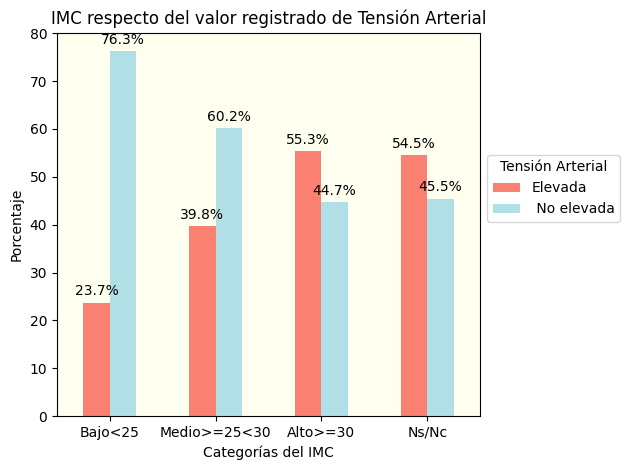

In [ ]:
#Grafico de barras porcentajes de IMC respecto al el valor registrado de Tensión Arterial
color_dict = {1: '#FA8072', 2: '#B0E0E6'}
plot3 = pd.crosstab(index=df_pregunta_2['imc_categorias_bima'],
            columns=df_pregunta_2['ta_elevada']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar',color=color_dict)

plot3.set_ylabel('Porcentaje')
plot3.set_xlabel('Categorías del IMC')
plot3.set_title('IMC respecto del valor registrado de Tensión Arterial')

imc_labels = ['Bajo<25', 'Medio>=25<30', 'Alto>=30', 'Ns/Nc']
plot3.set_xticklabels(imc_labels, rotation=0)

niveles_colesterol = ['Elevada', ' No elevada']
plot3.legend(title='Tensión Arterial', labels=niveles_colesterol, bbox_to_anchor=(1, 0.7))
plot3.set_facecolor('#FFFFF0')

for container in plot3.containers:
    for rect in container:
        height = rect.get_height()
        plot3.annotate(f'{height:.1f}%', xy=(rect.get_x() + rect.get_width() / 2, height),
                      xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')


plt.tight_layout()
plt.show()

---


Se observó que a medida que aumenta el **IMC** aumenta el porcentaje de personas con **tensión arterial elevada**. Incluso, para pesonas con OBESIDAD (IMC Alto>=30), se puede ver que hay un mayor porcentaje que tienen este parametro elevado.


---

In [ ]:
#Tabla cruzada entre los porcentajes de IMC y el valor registrado de Tensión Arterial, Colesterol, Glucemia
crosstab_7= pd.crosstab(index=df_pregunta_2['imc_categorias_bima'],
                     columns=[df_pregunta_2["ta_elevada"], df_pregunta_2["glucemia_elevada"], df_pregunta_2["colesterol_elevado"]]
                     ).apply(lambda r: r/r.sum() * 100, axis=1)
crosstab_7
#1 si
#2 no

ta_elevada                1.0                                       2.0  \
glucemia_elevada          1.0                  2.0                  1.0   
colesterol_elevado        1.0       2.0        1.0        2.0       1.0   
imc_categorias_bima                                                       
1.0                  0.522876  0.718954   7.581699  14.836601  0.980392   
2.0                  1.668727  3.028430  12.731768  21.940667  1.730532   
3.0                  3.932584  5.805243  16.167291  30.649189  1.560549   
99.0                 0.000000  6.250000  15.625000  31.250000  3.125000   

ta_elevada                                           
glucemia_elevada                     2.0             
colesterol_elevado        2.0        1.0        2.0  
imc_categorias_bima                                  
1.0                  1.437908  14.640523  59.281046  
2.0                  2.966625  15.203956  40.729295  
3.0                  2.684145  11.235955  27.965044  
99.0                 0.000000  18.750000  25.000000

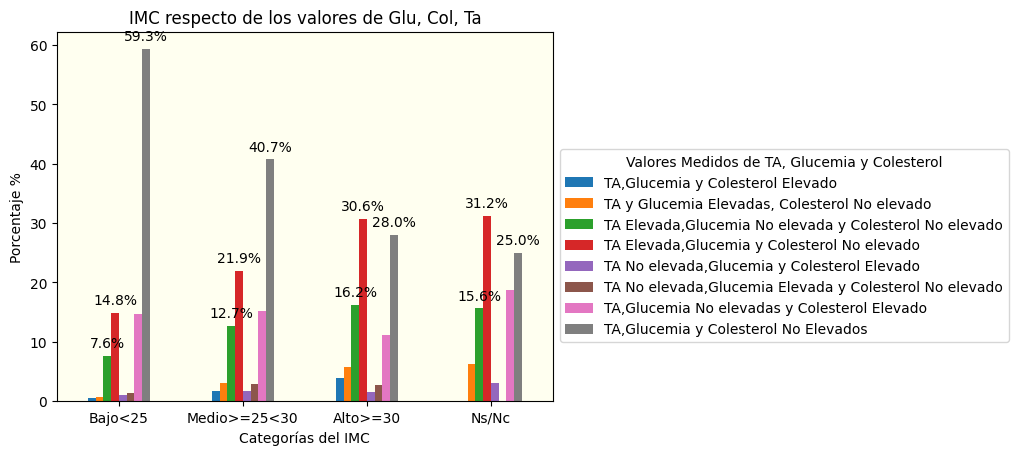

In [ ]:
#Grafico de barras entre los porcentajes de IMC y el valor registrado de Tensión Arterial, Colesterol, Glucemia

plot = crosstab_7.plot(kind='bar', width=0.5)
plt.xlabel('Categorías del IMC')
plt.ylabel('Porcentaje %')
plt.title('IMC respecto de los valores de Glu, Col, Ta')


plot.set_facecolor('#FFFFF0')
plt.legend(title=['TA Elevada', 'Glucemia Elevada', 'Colesterol Elevado'], bbox_to_anchor=(1, 1))
niveles_ = ["TA,Glucemia y Colesterol Elevado", "TA y Glucemia Elevadas, Colesterol No elevado",
            "TA Elevada,Glucemia No elevada y Colesterol No elevado", "TA Elevada,Glucemia y Colesterol No elevado",
            "TA No elevada,Glucemia y Colesterol Elevado", "TA No elevada,Glucemia Elevada y Colesterol No elevado",
            "TA,Glucemia No elevadas y Colesterol Elevado",
            "TA,Glucemia y Colesterol No Elevados"]
plt.legend(title='Valores Medidos de TA, Glucemia y Colesterol', labels=niveles_, bbox_to_anchor=(1, 0.7))

nombres_categorias = ['Bajo<25', 'Medio>=25<30', 'Alto>=30', 'Ns/Nc']
plt.xticks(range(len(nombres_categorias)), nombres_categorias, rotation=0)

barras_seleccionadas = [(3, 7),(3,6),(3,5),(3,4),(1, 7),(1,6),(1,5),(1,4),(1, 3),(1,2),(1,1),(1,0)]
for grupo, barra in barras_seleccionadas:
    height = plot.patches[grupo * len(crosstab_7.columns) + barra].get_height()
    plot.annotate(f'{height:.1f}%', xy=(plot.patches[grupo * len(crosstab_7.columns) + barra].get_x() + plot.patches[grupo * len(crosstab_7.columns) + barra].get_width() / 2, height),
                  xytext=(0, 4), textcoords="offset points",
                  ha='center', va='bottom')



plt.show()

---


En este grafico podemos observar que, nuevamente, cuando aumenta el **IMC** aumentan el porcentaje de persona que tienen los valores de **glucemia, tensión arteria y colesterol elevados**. Se destaca principalmente que las variables TA y Colesterol son las que mas peso tienen.


---

## CONCLUSION PREGUNTA 2


---
* Es evidente que hay una relación entre el **IMC** y las mediciones antropométricas y/o bioquímicas, en donde **cuando aumenta el IMC aumnetan los valores elevados medidos** de estos factores intermedios que pueden dar origen a Enfermedades No Transmisibles.
* Se debe destacar que hay un mayor porcentaje de personas con niveles elevados de **colesterol y tensión arterial.**
* Otra conclusion importante en este caso es que un mayor número de pesonas accedieron a medirse la tensión arterial comparado con las mediciones de glucemia y colesterol. Esto puede deberse a que la medicion de la tensión es menos invasiva.


---

##Pregunta 3

---

3. ¿La percepción que las personas poseen de su salud (i.e. excelente, buena, regular, etc.) se relaciona con los hábitos que las mismas poseen (por ejemplo, que reportan las personas en relación a su ingesta de alcohol, si son fumadoras o no, alimentación y/o actividad física)?

---

Se eligieron todas las variables relacionadas a esta pregunta. Sin embargo para responder seleccionamos las mas generales que nos permitian encontrar las asociaciones necesarias.

In [ ]:
df_pregunta_3 = df.loc[:,['cod_provincia','bhch03','bhch04', 'bisg01', 'bial08','consumo_regular_riesgo', 'nivel_actividad_fisica', 'biaf01', 'biaf03', 'bita01', 'bita04', 'consumo_tabaco_100', 'bial01', 'bial03', 'bial05', 'bica01', 'bica03_01', 'bipp01', 'bipp03', 'bicc02',"imc_categorias_bima"]]
df_pregunta_3[:3]

,cod_provincia,bhch03,bhch04,bisg01,bial08,consumo_regular_riesgo,nivel_actividad_fisica,biaf01,biaf03,bita01,...,consumo_tabaco_100,bial01,bial03,bial05,bica01,bica03_01,bipp01,bipp03,bicc02,imc_categorias_bima
0,2,1,32,3,2,2.0,1.0,4,4,2,...,3,2,7.0,7.0,1,1.0,NaN,NaN,NaN,3.0
1,2,2,65,1,2,2.0,1.0,3,1,1,...,3,2,7.0,5.0,1,NaN,1.0,1.0,2.0,NaN
2,2,2,33,2,2,2.0,2.0,0,3,1,...,2,1,5.0,5.0,1,NaN,2.0,1.0,NaN,NaN


In [ ]:
np.shape(df_pregunta_3)

(29224, 21)

Las variables seleccionadas para analizar son:
* `bhch03`: Sexo biologico. 1 Varon 2 Mujer
* `bisg01`: Como considera que es su salud. 1 excelenete, 2 muy buena, 3 buena, 4 regular, 5 mala
* `bial08`: Como considera su alimentacion. 1 muy saludable, 2 bastante saludable, 3 poco saludable,4 nada saludable, 99. NS/NC.
* `nivel_actividad_fisica`: 1 Alto, 2 Medio, 3 Bajo.
* `consumo_tabaco_100`: condicion del fumador. 1. Fumador actual, 2. Ex fumador, 3. No fumador.
* `bial01`: Agregas sal a las comidas?.1 Si, 2 No, 99. NS/NC
* `bial03:` Cuantos dias a la semana consume fruta?? 1-7 DIAS
* `bial05:` Cuantos dias a la semana comes verduras? 1-7 DIAS
* `bica01`: Consumiste alguna vez alcohol? 1 Si, 2 No.
* `imc_categorias_bima`: IMC agrupado según mediciones antropométricas. 1. Bajo (<25), 2. Medio( >=25 y <30), 3. Alto ( >=30), 99. Ns/Nc.



In [ ]:
df_pregunta_3.bisg01.describe() #1 excelenete, 2 muy buena, 3 buena, 4 regular, 5 mala

count    29224.000000
mean         2.798932
std          0.960866
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: bisg01, dtype: float64

In [ ]:
df_pregunta_3.bisg01.isnull().sum() #No hay nulos

0

---

Analizamos la percepcion de la salud de las personas separandolas por su *sexo biologico*

---

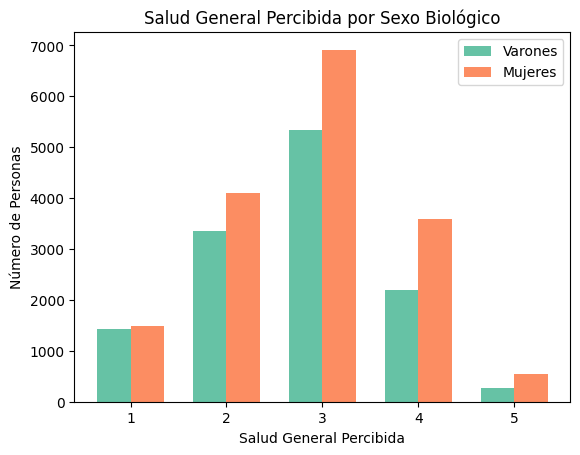

In [ ]:
#Graficos de barras de percepcion de salud general separando por sexo biologico (superpuesto).
# Creamos un subconjunto de datos solo con las columnas necesarias
df_subset = df_pregunta_3[['bhch03', 'bisg01']]

#Separamos el dataframe segun varones y mujeres
df_male = df_subset[df_subset['bhch03'] == 1]
df_female = df_subset[df_subset['bhch03'] == 2]

# Contar el número de ocurrencias para cada valor en 'bisg01' para hombres y mujeres
male_counts = df_male['bisg01'].value_counts().sort_index()
female_counts = df_female['bisg01'].value_counts().sort_index()

# Crear una figura y un eje de barras
fig, ax = plt.subplots()

# Configurar los valores en el eje x y las barras para hombres y mujeres
x = male_counts.index
width = 0.35

# Definir una paleta de colores personalizada
custom_palette = sns.color_palette('Set2')

# Graficar las barras para hombres y mujeres
ax.bar(x - width/2, male_counts, width,color=custom_palette[0], label='Varones')
ax.bar(x + width/2, female_counts, width, color=custom_palette[1], label='Mujeres')

# Configurar los ejes y etiquetas
ax.set_xlabel('Salud General Percibida')
ax.set_ylabel('Número de Personas')
ax.set_title('Salud General Percibida por Sexo Biológico')
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.legend()

# Mostrar el gráfico
plt.show()

---

Analizamos la relacion entre la percepcion de la salud de las personas y su *consumo de tabaco*

---

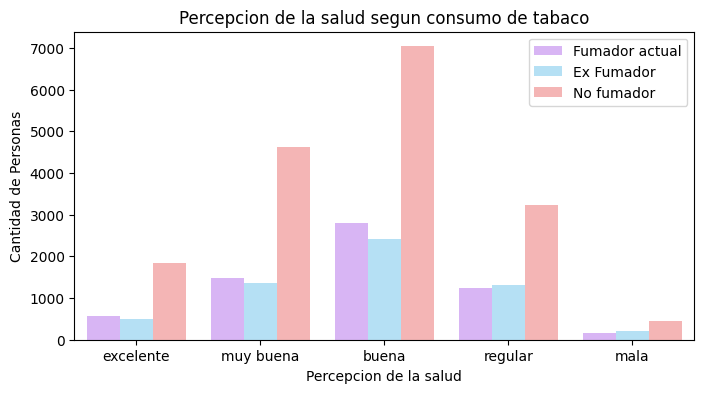

In [ ]:
fig = plt.figure(figsize=(8,4))

categories = ['excelente','muy buena','buena','regular','mala']
colors = ['#d9abff', '#abe4ff','#ffabab', '#ffdaab', '#ddffab']

ax = sns.countplot(x=df_pregunta_3.bisg01, hue=df_pregunta_3.consumo_tabaco_100, palette=colors)

# Etiquetas en las barras del histograma
ax.set_xticklabels(categories)
plt.title('Percepcion de la salud segun consumo de tabaco')
plt.xlabel('Percepcion de la salud')
plt.ylabel('Cantidad de Personas')
# Personalizar leyenda
legend_labels = ['Fumador actual', 'Ex Fumador', 'No fumador']
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, legend_labels, loc='upper right')

plt.show()

*   No existe diferencia significativa en la percepción de la salud entre las personas que fuman actualmente y las personas que se consideran ex fumadores. Inlcusive, en las categorías más bajas ("regular" y "mala") vemos que la cantidad de personas ex fumadoras está por encima de las personas fumadoras.
*   Se observa un gran incremento (en todas las categorías) en la cantidad de personas que se consideran no fumadoras. Para las personas que respondieron dentro de las categorías "buena", "muy buena" y "excelente" podemos inferir que son conscientes que una buena salud se aleja del consumo del tabaco. Mientras que unas pocas personas (las que respondieron "regular" y "mala") no tienen el mismo concepto y no establecen una relación entre un impacto positivo en su salud y el consumo de tabaco. Podemos suponer, que estas personas relacionan su percepción de la salud con otras variables diferentes a la del consumo del tabaco (alimentación, actividad fisica, etc).
*   Por último, vemos que la mayoría de las personas (independientemente de la relación que tegan con el tabaco) tienen una percepeción de la salud "buena".







---

Analizamos la relacion entre la percepcion de la salud de las personas y su *consumo de alcohol*

---

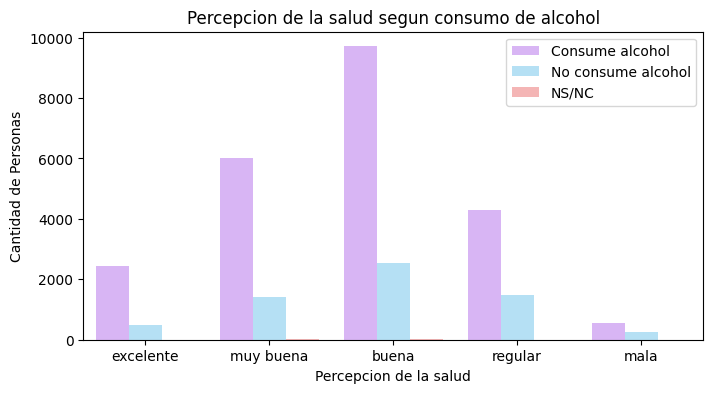

In [ ]:
fig = plt.figure(figsize=(8,4))

categories = ['excelente','muy buena','buena','regular','mala']
colors = ['#d9abff', '#abe4ff','#ffabab', '#ffdaab', '#ddffab']

ax = sns.countplot(x=df_pregunta_3.bisg01, hue=df_pregunta_3.bica01, palette=colors)

# Etiquetas en las barras del histograma
ax.set_xticklabels(categories)
plt.title('Percepcion de la salud segun consumo de alcohol')
plt.xlabel('Percepcion de la salud')
plt.ylabel('Cantidad de Personas')
# Personalizar leyenda
legend_labels = ['Consume alcohol', 'No consume alcohol', 'NS/NC']
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, legend_labels, loc='upper right')

plt.show() # Podemos inferir una baja percepcion de riesgo.
# El consumo de alcohol esta muy naturalizado.

Existe una gran diferencia entre las personas que dicen no consumir alcohol y las que si, sin importar la percepción de su salud que tengan. Tenemos una llamativa cantidad de personas que consideran que su salud es "excelente" y consumen alcohol. Esta encuesta demuestra y confirma que el alcohol es una droga socialmente aceptada y su impacto negativo en la salud es minimizado.

---

Analizamos la relacion entre la percepcion de la salud de las personas y su *alimentacion*

---

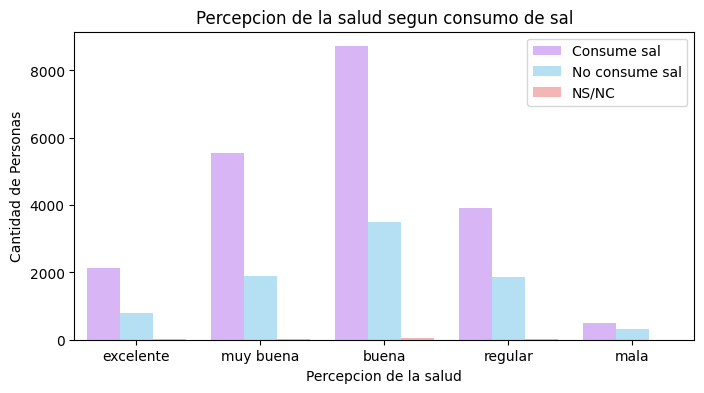

In [ ]:
fig = plt.figure(figsize=(8,4))

categories = ['excelente','muy buena','buena','regular','mala']
colors = ['#d9abff', '#abe4ff','#ffabab', '#ffdaab', '#ddffab']

ax = sns.countplot(x=df_pregunta_3.bisg01, hue=df_pregunta_3.bial01, palette=colors)

# Etiquetas en las barras del histograma
ax.set_xticklabels(categories)
plt.title('Percepcion de la salud segun consumo de sal')
plt.xlabel('Percepcion de la salud')
plt.ylabel('Cantidad de Personas')
# Personalizar leyenda
legend_labels = ['Consume sal', 'No consume sal', 'NS/NC']
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, legend_labels, loc='upper right')

plt.show()#Podemos inferir una baja percepcion de riesgo

Al igual que con el consumo de alcohol, la percepeción del riesgo en relación con el consumo del sal es bajo. Según la OMS, el consumo de sal "contribuye a la hipertensión arterial y aumentan el riesgo de cardiopatía y accidente cerebrovascular" y si observamos el gráfico, indifrentemente sea la percepción de la salud, la cantidad de personas que agregan sal a la comida es mayor.

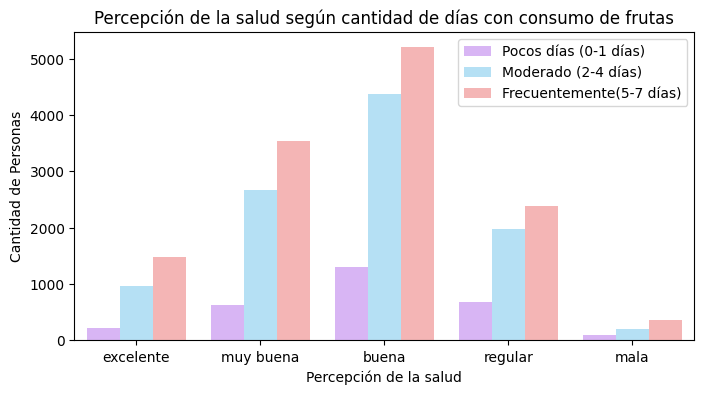

In [ ]:
# Agrupar los días de consumo de frutas en categorías
df_pregunta_3['frutas_cantidad'] = pd.cut(df_pregunta_3['bial03'], bins=[0, 1, 4, 7], labels=['pocos días', 'moderado', 'frecuentemente'])

# Etiquetas de los ejes X e Y
categories = ['excelente', 'muy buena', 'buena', 'regular', 'mala']
colors = ['#d9abff', '#abe4ff', '#ffabab', '#ffdaab', '#ddffab']

fig = plt.figure(figsize=(8, 4))

# Gráfico de barras
ax = sns.countplot(x=df_pregunta_3['bisg01'], hue=df_pregunta_3['frutas_cantidad'], palette=colors)

# Etiquetas en las barras del histograma
ax.set_xticklabels(categories)
plt.title('Percepción de la salud según cantidad de días con consumo de frutas')
plt.xlabel('Percepción de la salud')
plt.ylabel('Cantidad de Personas')

# Personalizar leyenda
legend_labels = ['Pocos días (0-1 días)', 'Moderado (2-4 días)', 'Frecuentemente(5-7 días)', 'NS/NC']
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, legend_labels, loc='upper right')

plt.show()

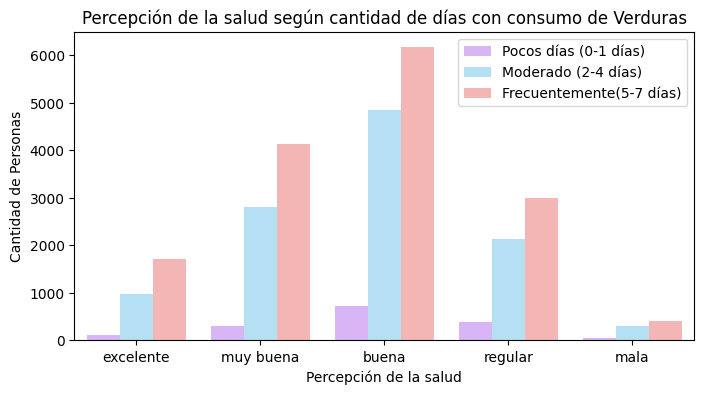

In [ ]:

# Agrupar los días de consumo de verduras en categorías
df_pregunta_3['frutas_cantidad'] = pd.cut(df_pregunta_3['bial05'], bins=[0, 1, 4, 7], labels=['pocos días', 'moderado', 'frecuentemente'])

# Etiquetas de los ejes X e Y
categories = ['excelente', 'muy buena', 'buena', 'regular', 'mala']
colors = ['#d9abff', '#abe4ff', '#ffabab', '#ffdaab', '#ddffab']

fig = plt.figure(figsize=(8, 4))

# Gráfico de barras
ax = sns.countplot(x=df_pregunta_3['bisg01'], hue=df_pregunta_3['frutas_cantidad'], palette=colors)

# Etiquetas en las barras del histograma
ax.set_xticklabels(categories)
plt.title('Percepción de la salud según cantidad de días con consumo de Verduras')
plt.xlabel('Percepción de la salud')
plt.ylabel('Cantidad de Personas')

# Personalizar leyenda
legend_labels = ['Pocos días (0-1 días)', 'Moderado (2-4 días)', 'Frecuentemente(5-7 días)', 'NS/NC']
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, legend_labels, loc='upper right')

plt.show()


Tanto en el consumo de frutas como en el verdura, tenemos una distribución de los datos similar. Esto indica que la mayoría de las personas, independientemente de la categoría en donde se encuentren poseen un consumo de estos alimentos frecuentemente.

---

Analizamos la relacion entre la percepcion de la salud de las personas y su *actividad fisica*

---

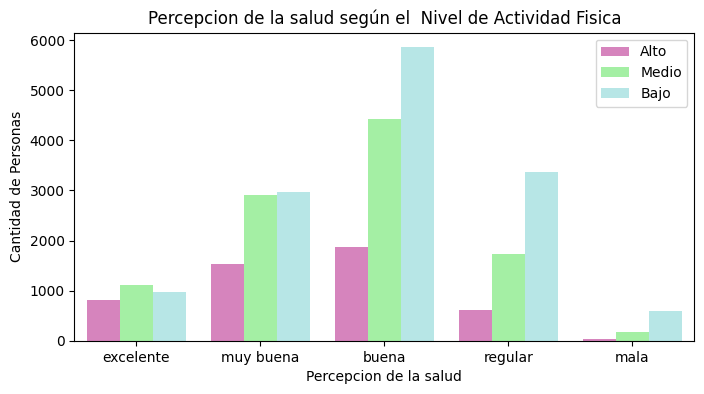

In [ ]:
fig = plt.figure(figsize=(8,4))

categories = ['excelente','muy buena','buena','regular','mala']
colors = ['#e377c2', '#98FB98','#AFEEEE']

ax = sns.countplot(x=df_pregunta_3.bisg01, hue=df_pregunta_3.nivel_actividad_fisica, palette=colors)

ax.set_xticklabels(categories)
plt.title('Percepcion de la salud según el  Nivel de Actividad Fisica')
plt.xlabel('Percepcion de la salud')
plt.ylabel('Cantidad de Personas')

legend_labels = ['Alto', 'Medio', 'Bajo']
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, legend_labels, loc='upper right')

plt.show()




A medida que la percepción de la salud de las personas es mejor, se observa que las respuestas del nivel de actividad fisica se va igualando, es decir que las personas establecene una relación positiva entre su salud y el hecho de realizar actividad fisica.

---

Analizamos la relacion entre la percepcion de la salud de las personas y su *Indice de Masa Corporal (IMC)*

---

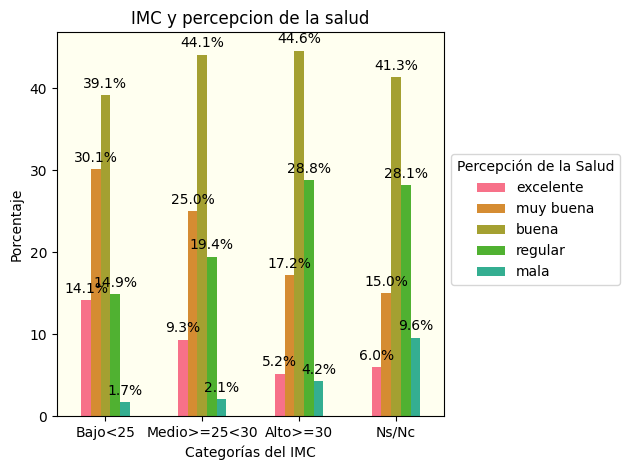

In [ ]:
#Grafico de barras porcentajes de IMC respecto al la percepcion de la salud de las personas
color_dict =sns.color_palette("husl", 9)
plot_ = pd.crosstab(index=df_pregunta_3['imc_categorias_bima'],
            columns=df_pregunta_3['bisg01']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar',color=color_dict)

plot_.set_ylabel('Porcentaje')
plot_.set_xlabel('Categorías del IMC')
plot_.set_title('IMC y percepcion de la salud')

_labels = ['Bajo<25', 'Medio>=25<30', 'Alto>=30', 'Ns/Nc']
plot_.set_xticklabels(_labels, rotation=0)

niveles_PS = ['excelente', 'muy buena', 'buena', 'regular', 'mala']
plot_.legend(title='Percepción de la Salud', labels=niveles_PS, bbox_to_anchor=(1, 0.7))
plot_.set_facecolor('#FFFFF0')

for container in plot_.containers:
    for rect in container:
        height = rect.get_height()
        plot_.annotate(f'{height:.1f}%', xy=(rect.get_x() + rect.get_width() / 2, height),
                      xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')


plt.tight_layout()
plt.show()

Se observo que cuando aumenta el IMC disminuye el porcentaje de personas que concideran que su salud es "exelente" o "muy buena" y aumenta el porcentaje de personas que la concideran "regular" o "mala". No se observo esta tendencia cuando se concidero que su salud era "buena".

## CONCLUSION PREGUNTA 3

En resumen, respondiendo a la pregunta planteada podemos establecer las siguientes relaciones de la percepción de la salud respecto a los habitos que poseen:

Se encontró que la percepción de la salud no difiere significativamente entre fumadores actuales y ex fumadores.  Se destacó una discrepancia entre aquellos que consideran su salud excelente y consumen alcohol, así como una baja percepción del riesgo asociado al consumo de sal. El consumo de frutas y verduras fue frecuente en la mayoría de las personas. Se estableció una relación positiva entre una mejor percepción de la salud y la práctica de actividad física. A medida que el índice de masa corporal (IMC) aumenta, disminuye la percepción de una salud excelente o muy buena.

Estos hallazgos enfatizan la importancia de la conciencia informada sobre los factores de estilo de vida y su impacto en la salud.

# Analisis Extras

4.¿Hay relación entre los hábitos que poseen las personas (fumar, consumo de sal, consumo de alcohol actividad física) con sus mediciones bioquímicas antropométricas y/o bioquímicas?

In [ ]:
df_pregunta_4= df.loc[:,["consumo_tabaco_100","bica01", "bial01", "ta_elevada", "glucemia_elevada", "colesterol_elevado","nivel_actividad_fisica"]]
df_pregunta_4[:3]

,consumo_tabaco_100,bica01,bial01,ta_elevada,glucemia_elevada,colesterol_elevado,nivel_actividad_fisica
0,3,1,2,1.0,NaN,NaN,1.0
1,3,1,2,NaN,NaN,NaN,1.0
2,2,1,1,NaN,NaN,NaN,2.0


Descripción de las variables:
* `consumo_tabaco_100`: 1. Fumador 2. Ex fumador 3. No fumador
* `bica01`: Consumiste alguna vez alcohol? SI/NO
* `bial01`: Agregas sal a las comidas?
* `ta_elevada`:Presion arterial.  1 Elevada (promedio sistolica>=140 y promedio_diastolica>=90), 2 No elevada (promedio_sistolica < 140 y promedio_diastolica < 90).
* `glucemia_elevada`: Glucemia elevada en mediciones bioquímicas. 1. Elevada (>=110), 2. No elevada(<110)
* `colesterol_elevado`: Colesterol elevado en mediciones bioquímicas. 1. Elevado (>= 200), 2. No elevado (< 200)
* `nivel_actividad_fisica`: 1 Alto, 2 Medio, 3 Bajo.




---


Se analizaron en gráficos de barras el porcentaje de personas que consumen alcohol, consume sal, fuman y hacen actividad física con respeto a las distintas mediciones bioquímicas antropométricas y/o bioquímicas


---



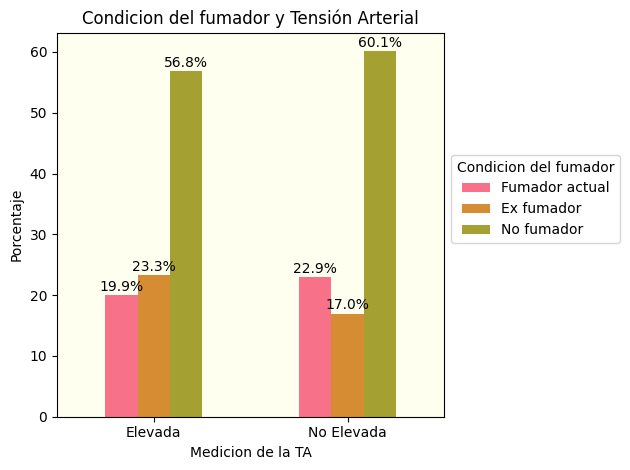

In [ ]:
#Grafico de barras porcentajes: Condicion del fumador vs TA
color_dict =sns.color_palette("husl", 9)
plot_preg5 = pd.crosstab(index=df_pregunta_4['ta_elevada'],
            columns=df_pregunta_4['consumo_tabaco_100']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar',color=color_dict)

plot_preg5.set_ylabel('Porcentaje')
plot_preg5.set_xlabel('Medicion de la TA')
plot_preg5.set_title('Condicion del fumador y Tensión Arterial')

_labels = ['Elevada', 'No Elevada']
plot_preg5.set_xticklabels(_labels, rotation=0)

niveles_ = ['Fumador actual', 'Ex fumador', 'No fumador',]
plot_preg5.legend(title='Condicion del fumador', labels=niveles_, bbox_to_anchor=(1, 0.7))
plot_preg5.set_facecolor('#FFFFF0')

for container in plot_preg5.containers:
    for rect in container:
        height = rect.get_height()
        plot_preg5.annotate(f'{height:.1f}%', xy=(rect.get_x() + rect.get_width() / 2, height),
                      xytext=(0, 1), textcoords="offset points", ha='center', va='bottom')


plt.tight_layout()
plt.show()

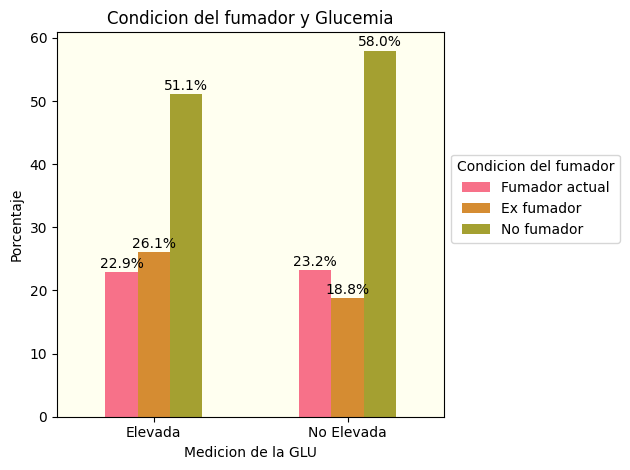

In [ ]:
#Grafico de barras porcentajes: Condicion del fumador vs Glucemia
color_dict =sns.color_palette("husl", 9)
plot_preg5 = pd.crosstab(index=df_pregunta_4['glucemia_elevada'],
            columns=df_pregunta_4['consumo_tabaco_100']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar',color=color_dict)

plot_preg5.set_ylabel('Porcentaje')
plot_preg5.set_xlabel('Medicion de la GLU')
plot_preg5.set_title('Condicion del fumador y Glucemia')

_labels = ['Elevada', 'No Elevada']
plot_preg5.set_xticklabels(_labels, rotation=0)

niveles_ = ['Fumador actual', 'Ex fumador', 'No fumador',]
plot_preg5.legend(title='Condicion del fumador', labels=niveles_, bbox_to_anchor=(1, 0.7))
plot_preg5.set_facecolor('#FFFFF0')

for container in plot_preg5.containers:
    for rect in container:
        height = rect.get_height()
        plot_preg5.annotate(f'{height:.1f}%', xy=(rect.get_x() + rect.get_width() / 2, height),
                      xytext=(0, 1), textcoords="offset points", ha='center', va='bottom')


plt.tight_layout()
plt.show()

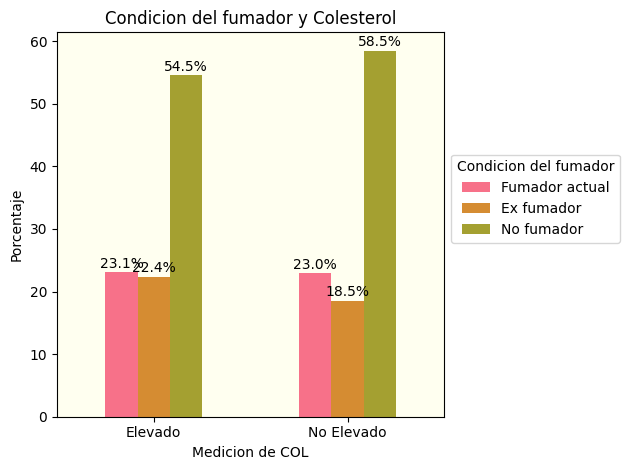

In [ ]:
#Grafico de barras porcentajes: Condicion del fumador vs Colesterol
color_dict =sns.color_palette("husl", 9)
plot_preg5 = pd.crosstab(index=df_pregunta_4['colesterol_elevado'],
            columns=df_pregunta_4['consumo_tabaco_100']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar',color=color_dict)

plot_preg5.set_ylabel('Porcentaje')
plot_preg5.set_xlabel('Medicion de COL')
plot_preg5.set_title('Condicion del fumador y Colesterol')

imc_labels = ['Elevado', 'No Elevado']
plot_preg5.set_xticklabels(imc_labels, rotation=0)

niveles_colesterol = ['Fumador actual', 'Ex fumador', 'No fumador',]
plot_preg5.legend(title='Condicion del fumador', labels=niveles_colesterol, bbox_to_anchor=(1, 0.7))
plot_preg5.set_facecolor('#FFFFF0')

for container in plot_preg5.containers:
    for rect in container:
        height = rect.get_height()
        plot_preg5.annotate(f'{height:.1f}%', xy=(rect.get_x() + rect.get_width() / 2, height),
                      xytext=(0, 1), textcoords="offset points", ha='center', va='bottom')


plt.tight_layout()
plt.show()

---


No se observaron diferencias relevantes entre la condición del fumador con respecto a las mediciones de TA, GLU y COL.


---


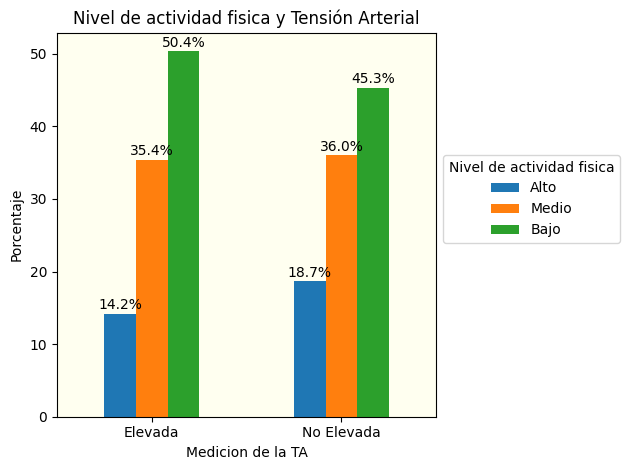

In [ ]:
#Grafico de barras porcentajes: nivel de actividad fisica vs TA
color_dict =sns.color_palette("tab10")
plot_preg6 = pd.crosstab(index=df_pregunta_4['ta_elevada'],
            columns=df_pregunta_4["nivel_actividad_fisica"]).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar',color=color_dict)

plot_preg6.set_ylabel('Porcentaje')
plot_preg6.set_xlabel('Medicion de la TA')
plot_preg6.set_title('Nivel de actividad fisica y Tensión Arterial')

_labels = ['Elevada', 'No Elevada']
plot_preg6.set_xticklabels(_labels, rotation=0)

niveles_ = [ "Alto", "Medio", "Bajo"]
plot_preg6.legend(title='Nivel de actividad fisica', labels=niveles_, bbox_to_anchor=(1, 0.7))
plot_preg6.set_facecolor('#FFFFF0')

for container in plot_preg6.containers:
    for rect in container:
        height = rect.get_height()
        plot_preg6.annotate(f'{height:.1f}%', xy=(rect.get_x() + rect.get_width() / 2, height),
                      xytext=(0, 1), textcoords="offset points", ha='center', va='bottom')


plt.tight_layout()
plt.show()

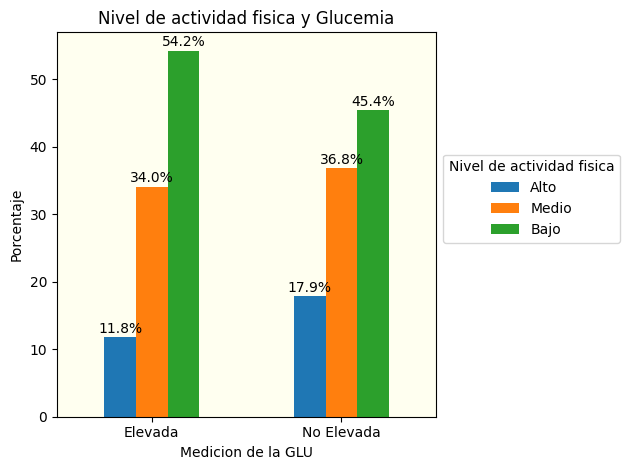

In [ ]:
#Grafico de barras porcentajes: Nivel de actividad fisica vs Glucemia
color_dict =sns.color_palette("tab10")
plot_preg6 = pd.crosstab(index=df_pregunta_4['glucemia_elevada'],
            columns=df_pregunta_4["nivel_actividad_fisica"]).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar',color=color_dict)

plot_preg6.set_ylabel('Porcentaje')
plot_preg6.set_xlabel('Medicion de la GLU')
plot_preg6.set_title('Nivel de actividad fisica y Glucemia')

_labels = ['Elevada', 'No Elevada']
plot_preg6.set_xticklabels(_labels, rotation=0)

niveles_= [ "Alto", "Medio", "Bajo"]
plot_preg6.legend(title='Nivel de actividad fisica', labels=niveles_, bbox_to_anchor=(1, 0.7))
plot_preg6.set_facecolor('#FFFFF0')

for container in plot_preg6.containers:
    for rect in container:
        height = rect.get_height()
        plot_preg6.annotate(f'{height:.1f}%', xy=(rect.get_x() + rect.get_width() / 2, height),
                      xytext=(0, 1), textcoords="offset points", ha='center', va='bottom')


plt.tight_layout()
plt.show()

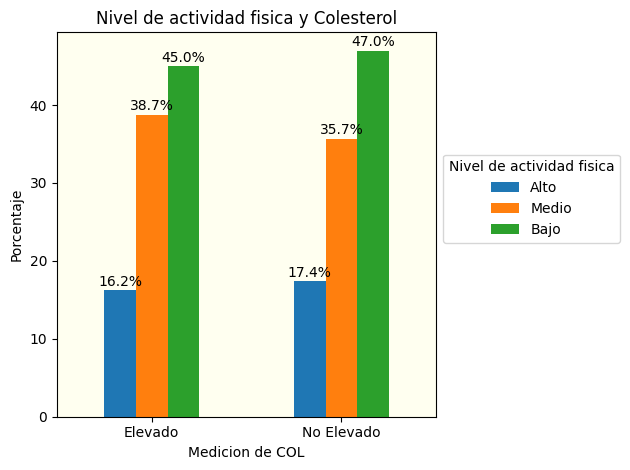

In [ ]:
#Grafico de barras porcentajes: Nivel de actividad fisica vs Colesterol
color_dict =sns.color_palette("tab10")
plot_preg6 = pd.crosstab(index=df_pregunta_4['colesterol_elevado'],
            columns=df_pregunta_4["nivel_actividad_fisica"]).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar',color=color_dict)

plot_preg6.set_ylabel('Porcentaje')
plot_preg6.set_xlabel('Medicion de COL')
plot_preg6.set_title('Nivel de actividad fisica y Colesterol')

imc_labels = ['Elevado', 'No Elevado']
plot_preg6.set_xticklabels(imc_labels, rotation=0)

niveles_colesterol = [ "Alto", "Medio", "Bajo"]
plot_preg6.legend(title='Nivel de actividad fisica', labels=niveles_colesterol, bbox_to_anchor=(1, 0.7))
plot_preg6.set_facecolor('#FFFFF0')

for container in plot_preg6.containers:
    for rect in container:
        height = rect.get_height()
        plot_preg6.annotate(f'{height:.1f}%', xy=(rect.get_x() + rect.get_width() / 2, height),
                      xytext=(0, 1), textcoords="offset points", ha='center', va='bottom')


plt.tight_layout()
plt.show()

---


En el caso de la actividad física, no se observaron grandes cambios en los porcentajes con respecto a las mediciones de TA, GLU y COL.


---


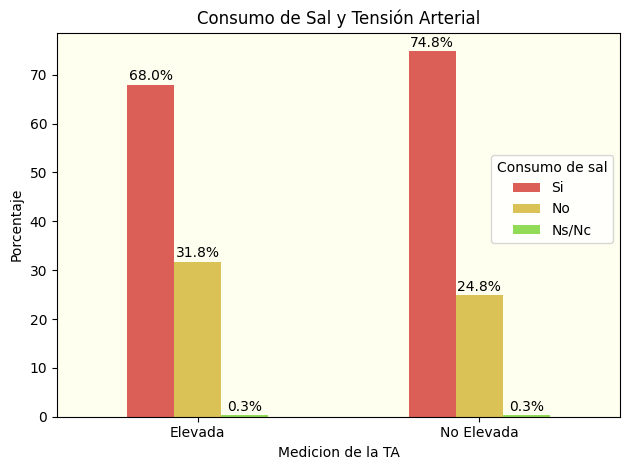

In [ ]:
#Grafico de barras porcentajes: Consumo de sal vs TA
color_dict =sns.color_palette("hls", 8)
plot_preg7 = pd.crosstab(index=df_pregunta_4['ta_elevada'],
            columns=df_pregunta_4["bial01"]).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar',color=color_dict)

plot_preg7.set_ylabel('Porcentaje')
plot_preg7.set_xlabel('Medicion de la TA')
plot_preg7.set_title('Consumo de Sal y Tensión Arterial')

_labels = ['Elevada', 'No Elevada']
plot_preg7.set_xticklabels(_labels, rotation=0)

niveles_ = [ "Si", "No", "Ns/Nc"]
plot_preg7.legend(title='Consumo de sal', labels=niveles_, bbox_to_anchor=(1, 0.7))
plot_preg7.set_facecolor('#FFFFF0')

for container in plot_preg7.containers:
    for rect in container:
        height = rect.get_height()
        plot_preg7.annotate(f'{height:.1f}%', xy=(rect.get_x() + rect.get_width() / 2, height),
                      xytext=(0, 1), textcoords="offset points", ha='center', va='bottom')


plt.tight_layout()
plt.show()

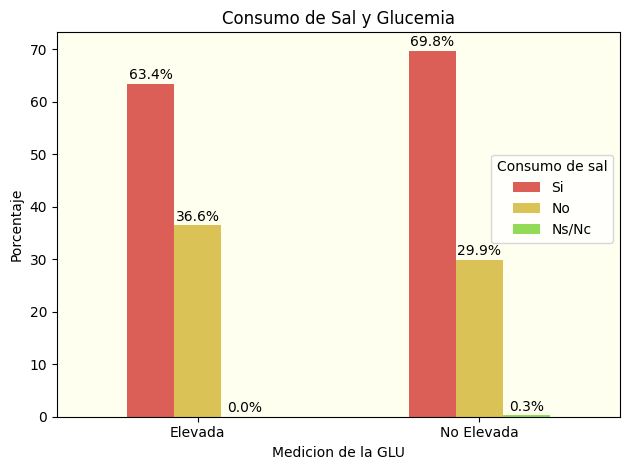

In [ ]:
#Grafico de barras porcentajes: Consumo de sal vs Glucemia
color_dict =sns.color_palette("hls", 8)
plot_preg7 = pd.crosstab(index=df_pregunta_4['glucemia_elevada'],
            columns=df_pregunta_4["bial01"]).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar',color=color_dict)

plot_preg7.set_ylabel('Porcentaje')
plot_preg7.set_xlabel('Medicion de la GLU')
plot_preg7.set_title('Consumo de Sal y Glucemia')

_labels = ['Elevada', 'No Elevada']
plot_preg7.set_xticklabels(_labels, rotation=0)

niveles_ = [ "Si", "No", "Ns/Nc"]
plot_preg7.legend(title='Consumo de sal', labels=niveles_, bbox_to_anchor=(1, 0.7))
plot_preg7.set_facecolor('#FFFFF0')

for container in plot_preg7.containers:
    for rect in container:
        height = rect.get_height()
        plot_preg7.annotate(f'{height:.1f}%', xy=(rect.get_x() + rect.get_width() / 2, height),
                      xytext=(0, 1), textcoords="offset points", ha='center', va='bottom')


plt.tight_layout()
plt.show()

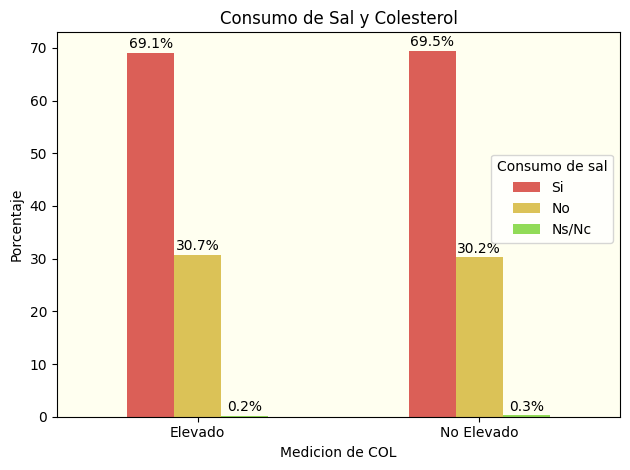

In [ ]:
#Grafico de barras porcentajes: Consumo de sal vs Colesterol
color_dict =sns.color_palette("hls", 8)
plot_preg7 = pd.crosstab(index=df_pregunta_4['colesterol_elevado'],
            columns=df_pregunta_4["bial01"]).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar',color=color_dict)

plot_preg7.set_ylabel('Porcentaje')
plot_preg7.set_xlabel('Medicion de COL')
plot_preg7.set_title('Consumo de Sal y Colesterol')

imc_labels = ['Elevado', 'No Elevado']
plot_preg7.set_xticklabels(imc_labels, rotation=0)

niveles_colesterol = [ "Si", "No", "Ns/Nc"]
plot_preg7.legend(title='Consumo de sal', labels=niveles_colesterol, bbox_to_anchor=(1, 0.7))
plot_preg7.set_facecolor('#FFFFF0')

for container in plot_preg7.containers:
    for rect in container:
        height = rect.get_height()
        plot_preg7.annotate(f'{height:.1f}%', xy=(rect.get_x() + rect.get_width() / 2, height),
                      xytext=(0, 1), textcoords="offset points", ha='center', va='bottom')


plt.tight_layout()
plt.show()

---


Contrario a lo esperado, no hay relación entre consumir sal y tener la tensión elevada. Tampoco se observaron diferencias entre consumir sal y los valores medidos de GLU y COL.


---



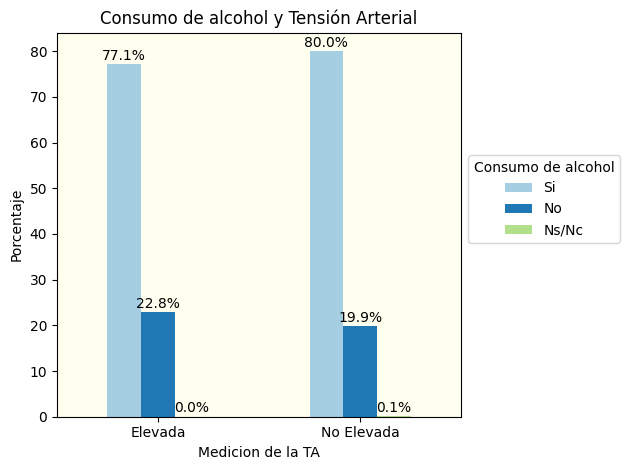

In [ ]:
#Grafico de barras porcentajes: Consumo de alcohol vs TA
color_dict =sns.color_palette("Paired")
plot_preg7 = pd.crosstab(index=df_pregunta_4['ta_elevada'],
            columns=df_pregunta_4["bica01"]).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar',color=color_dict)

plot_preg7.set_ylabel('Porcentaje')
plot_preg7.set_xlabel('Medicion de la TA')
plot_preg7.set_title('Consumo de alcohol y Tensión Arterial')

_labels = ['Elevada', 'No Elevada']
plot_preg7.set_xticklabels(_labels, rotation=0)

niveles_ = [ "Si", "No", "Ns/Nc"]
plot_preg7.legend(title='Consumo de alcohol', labels=niveles_, bbox_to_anchor=(1, 0.7))
plot_preg7.set_facecolor('#FFFFF0')

for container in plot_preg7.containers:
    for rect in container:
        height = rect.get_height()
        plot_preg7.annotate(f'{height:.1f}%', xy=(rect.get_x() + rect.get_width() / 2, height),
                      xytext=(0, 1), textcoords="offset points", ha='center', va='bottom')


plt.tight_layout()
plt.show()

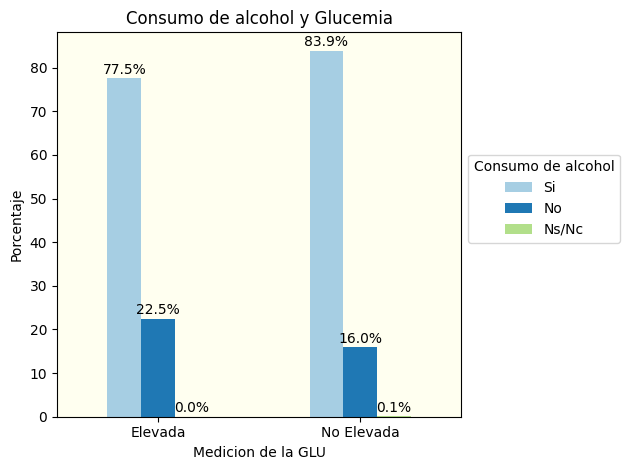

In [ ]:
#Grafico de barras porcentajes: Consumo de alcohol vs Glucemia
color_dict =sns.color_palette("Paired")
plot_preg7 = pd.crosstab(index=df_pregunta_4['glucemia_elevada'],
            columns=df_pregunta_4["bica01"]).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar',color=color_dict)

plot_preg7.set_ylabel('Porcentaje')
plot_preg7.set_xlabel('Medicion de la GLU')
plot_preg7.set_title('Consumo de alcohol y Glucemia')

_labels = ['Elevada', 'No Elevada']
plot_preg7.set_xticklabels(_labels, rotation=0)

niveles_= [ "Si", "No", "Ns/Nc"]
plot_preg7.legend(title='Consumo de alcohol', labels=niveles_, bbox_to_anchor=(1, 0.7))
plot_preg7.set_facecolor('#FFFFF0')

for container in plot_preg7.containers:
    for rect in container:
        height = rect.get_height()
        plot_preg7.annotate(f'{height:.1f}%', xy=(rect.get_x() + rect.get_width() / 2, height),
                      xytext=(0, 1), textcoords="offset points", ha='center', va='bottom')


plt.tight_layout()
plt.show()

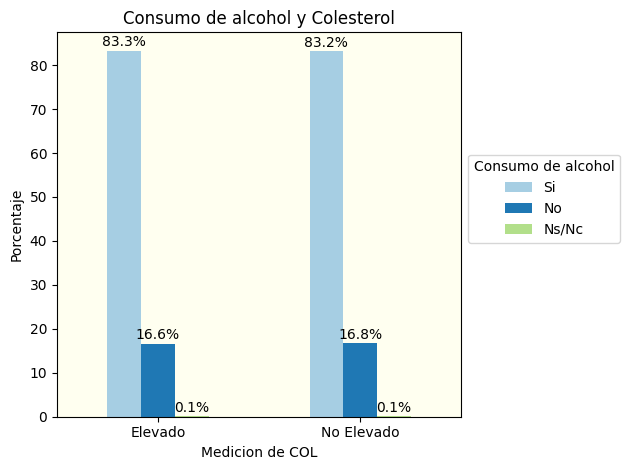

In [ ]:
#Grafico de barras porcentajes: Consumo de alcohol vs Colesterol
color_dict =sns.color_palette("Paired")
plot_preg7 = pd.crosstab(index=df_pregunta_4['colesterol_elevado'],
            columns=df_pregunta_4["bica01"]).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar',color=color_dict)

plot_preg7.set_ylabel('Porcentaje')
plot_preg7.set_xlabel('Medicion de COL')
plot_preg7.set_title('Consumo de alcohol y Colesterol')

imc_labels = ['Elevado', 'No Elevado']
plot_preg7.set_xticklabels(imc_labels, rotation=0)

niveles_colesterol = [ "Si", "No", "Ns/Nc"]
plot_preg7.legend(title='Consumo de alcohol', labels=niveles_colesterol, bbox_to_anchor=(1, 0.7))
plot_preg7.set_facecolor('#FFFFF0')

for container in plot_preg7.containers:
    for rect in container:
        height = rect.get_height()
        plot_preg7.annotate(f'{height:.1f}%', xy=(rect.get_x() + rect.get_width() / 2, height),
                      xytext=(0, 1), textcoords="offset points", ha='center', va='bottom')


plt.tight_layout()
plt.show()

---


En cuanto al consumo de alcohol, tampoco se lograron establecer diferencias entre tener valores medidos elevados de TA, GLU y COL y consumir o no alcohol. Se destaca, nuevamente, la alta prevalencia en el consumo de alcohol por parte de las personas.


---


# CONCLUSION PREGUNTA 4

---


* No se pudo establecer una relación entre los hábitos de las personas  con sus mediciones antropométricas y/o bioquímicas elevadas.
* Es importante destacar que estas mediciones se realizaron una sola vez por lo que no se puede establecer que efectivamente estas personas tienen algún factor de riesgo intermedio a las enfermedades no transmisibles como son la hiperlipidemia, hiperglucemia o hipertensión arterial.
* Por otro lado, es importante destacar, que los hábitos no saludables tienen sus repercusiones a largo plazo. Por lo que, en ocasiones, no se manifiestan ni síntomas ni signos sino hasta después de un periodo prolongado de tiempo.
* Teniendo en cuenta lo mencionado con anterioridad, es muy probable que la gente este relacionando su salud con ausencia de enfermedad sin tener en cuenta el impacto que los malos hábitos tienen a largo plazo.


---
